# Plan 

1. Explore the Data: Python
 - Describe Method
 - Checking Null Values
 - Using Matplotlib & Seaborn
 - Categorical and Numerical
 - Data Cleaning
 - Data Pre-Processing(Scaling numerical variables and encoding categorical variables)
2. Build a Model
 - * Use the same level of accuracy on all models
3. Visualize
 - Tableau
4. SQL

# Mid-Project

In [1]:
# Importing Libraries before anything else

In [2]:
import numpy as np
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
import seaborn as sns 
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import boxcox
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Reading File, the csv did not give me header names. Had to read the Excel file instead.

In [3]:
data = pd.read_excel('/Users/dchrobak/Desktop/School/Mid-Project/data_mid_bootcamp_project_regression/regression_data.xls')

In [4]:
data.describe()

id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   4.580474e+09      3.373200      2.115826   2080.321850  1.509941e+04   
std    2.876736e+09      0.926299      0.768984    918.106125  4.141264e+04   
min    1.000102e+06      1.000000      0.500000    370.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1430.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068500e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.007547      0.234292      3.409825      7.657915   
std        0.539683      0.086549      0.766390      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     291.725008   1970.999676     84.464787  98077.951845   
std      827.759761     442.667800     29.375234    401.821438     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15         price  
count  21597.000000  21597.000000   21597.000000   21597.000000  2.159700e+04  
mean      47.560093   -122.213982    1986.620318   12758.283512  5.402966e+05  
std        0.138552      0.140724     685.230472   27274.441950  3.673681e+05  
min       47.155900   -122.519000     399.000000     651.000000  7.800000e+04  
25%       47.471100   -122.328000    1490.000000    5100.000000  3.220000e+05  
50%       47.571800   -122.231000    1840.000000    7620.000000  4.500000e+05  
75%       47.678000   -122.125000    2360.000000   10083.000000  6.450000e+05  
max       47.777600   -121.315000    6210.000000  871200.000000  7.700000e+06

In [5]:
data.head()

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520 2014-10-13         3       1.00         1180      5650     1.0   
1  6414100192 2014-12-09         3       2.25         2570      7242     2.0   
2  5631500400 2015-02-25         2       1.00          770     10000     1.0   
3  2487200875 2014-12-09         4       3.00         1960      5000     1.0   
4  1954400510 2015-02-18         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000  
3             0    98136  47.5208 -122.393           1360        5000  604000  
4             0    98074  47.6168 -122.045           1800        7503  510000

In [6]:
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [7]:
for column_name in data.columns:
    print (column_name)

id
date
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15
price


In [8]:
data.isnull()

id   date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      False  False     False      False        False     False   False   
1      False  False     False      False        False     False   False   
2      False  False     False      False        False     False   False   
3      False  False     False      False        False     False   False   
4      False  False     False      False        False     False   False   
...      ...    ...       ...        ...          ...       ...     ...   
21592  False  False     False      False        False     False   False   
21593  False  False     False      False        False     False   False   
21594  False  False     False      False        False     False   False   
21595  False  False     False      False        False     False   False   
21596  False  False     False      False        False     False   False   

       waterfront   view  condition  grade  sqft_above  sqft_basement  \
0           False  False      False  False       False          False   
1           False  False      False  False       False          False   
2           False  False      False  False       False          False   
3           False  False      False  False       False          False   
4           False  False      False  False       False          False   
...           ...    ...        ...    ...         ...            ...   
21592       False  False      False  False       False          False   
21593       False  False      False  False       False          False   
21594       False  False      False  False       False          False   
21595       False  False      False  False       False          False   
21596       False  False      False  False       False          False   

       yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
0         False         False    False  False  False          False   
1         False         False    False  False  False          False   
2         False         False    False  False  False          False   
3         False         False    False  False  False          False   
4         False         False    False  False  False          False   
...         ...           ...      ...    ...    ...            ...   
21592     False         False    False  False  False          False   
21593     False         False    False  False  False          False   
21594     False         False    False  False  False          False   
21595     False         False    False  False  False          False   
21596     False         False    False  False  False          False   

       sqft_lot15  price  
0           False  False  
1           False  False  
2           False  False  
3           False  False  
4           False  False  
...           ...    ...  
21592       False  False  
21593       False  False  
21594       False  False  
21595       False  False  
21596       False  False  

[21597 rows x 21 columns]

In [9]:
data.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [10]:
data.columns.isnull().sum()

0

In [11]:
data.head()

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520 2014-10-13         3       1.00         1180      5650     1.0   
1  6414100192 2014-12-09         3       2.25         2570      7242     2.0   
2  5631500400 2015-02-25         2       1.00          770     10000     1.0   
3  2487200875 2014-12-09         4       3.00         1960      5000     1.0   
4  1954400510 2015-02-18         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000  
3             0    98136  47.5208 -122.393           1360        5000  604000  
4             0    98074  47.6168 -122.045           1800        7503  510000

In [12]:
data_col= pd.DataFrame(data, columns=['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'])

In [13]:
# Drop unessacary columns

In [14]:
data.drop(['id'], inplace = True, axis = 1)

In [15]:
data.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 2014-10-13         3       1.00         1180      5650     1.0           0   
1 2014-12-09         3       2.25         2570      7242     2.0           0   
2 2015-02-25         2       1.00          770     10000     1.0           0   
3 2014-12-09         4       3.00         1960      5000     1.0           0   
4 2015-02-18         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15   price  
0    98178  47.5112 -122.257           1340        5650  221900  
1    98125  47.7210 -122.319           1690        7639  538000  
2    98028  47.7379 -122.233           2720        8062  180000  
3    98136  47.5208 -122.393           1360        5000  604000  
4    98074  47.6168 -122.045           1800        7503  510000

In [16]:
# create bar plot value counts x/y

In [17]:
data['zipcode']

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: int64

In [18]:
data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [19]:
data['price']

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21592    360000
21593    400000
21594    402101
21595    400000
21596    325000
Name: price, Length: 21597, dtype: int64

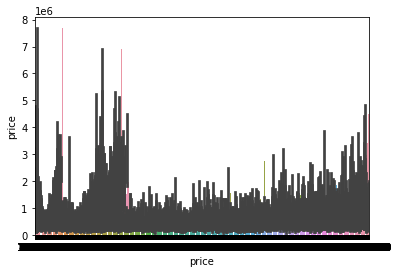

In [20]:
for col in data.columns:
   sns.barplot(x = col, y = 'price', data=data)
plt.show()

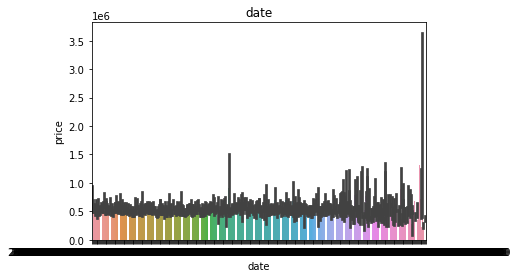

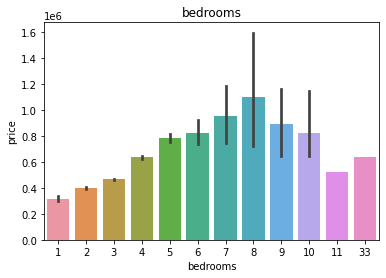

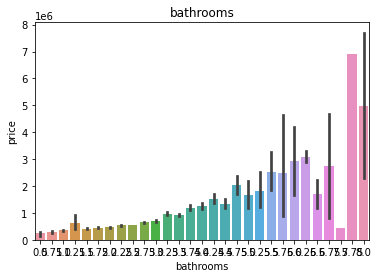

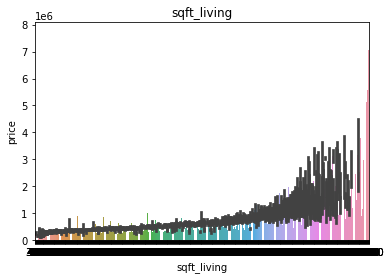

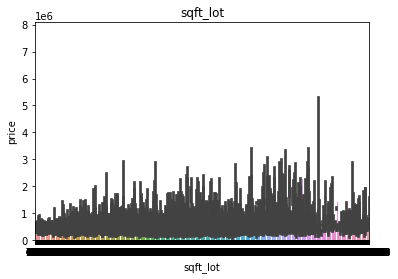

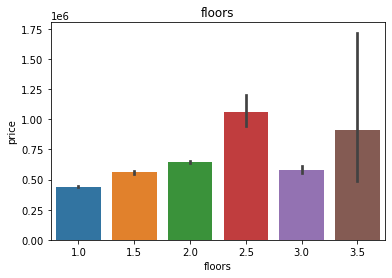

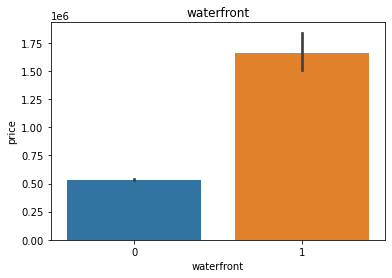

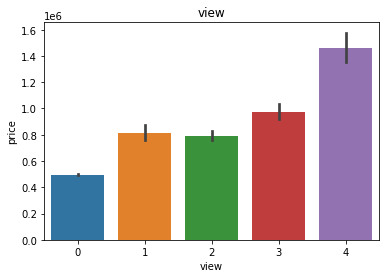

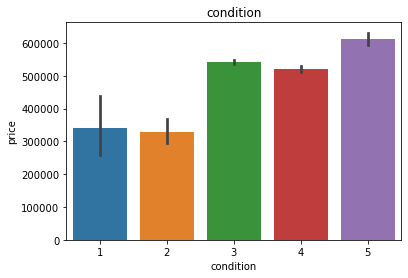

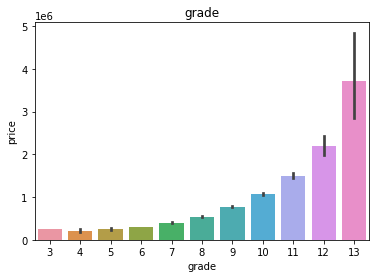

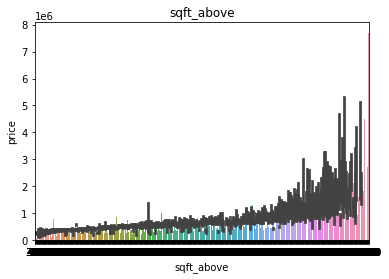

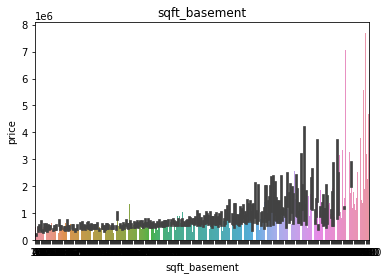

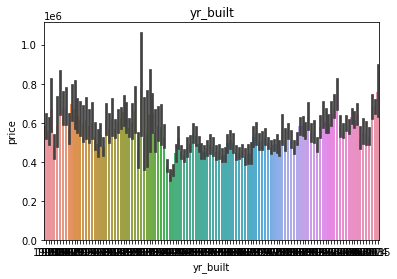

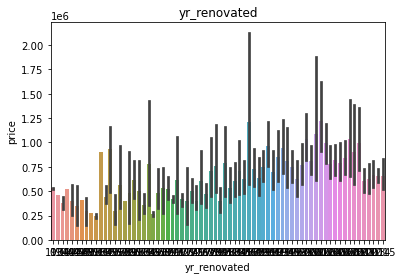

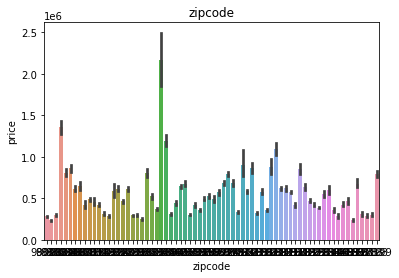

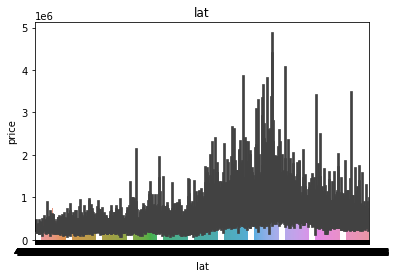

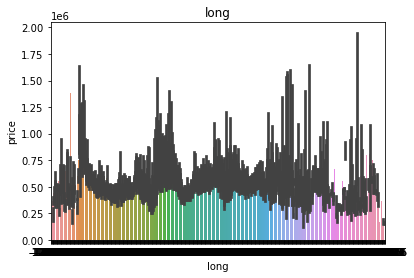

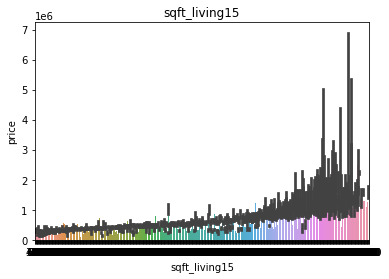

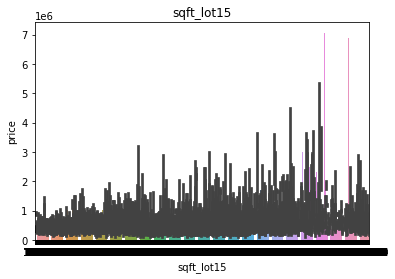

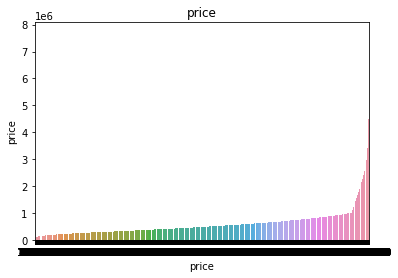

In [21]:
for i in data:
    plt.figure()
    sns.barplot(x = data[i], y = 'price', data=data)
    plt.title(i)

In [22]:
data['zipcode'].nunique()

70

In [23]:
data['waterfront'].unique()

array([0, 1])

In [24]:
data['view'].unique()

array([0, 3, 4, 2, 1])

In [25]:
data.dtypes

date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

#### Transforming to categorical

In [26]:
data['view']= data['view'].astype(object)

In [27]:
data['waterfront']= data['waterfront'].astype(object)

In [28]:
data['zipcode']= data['zipcode'].astype(object)

In [29]:
data['lat']= data['lat'].astype(object)

In [30]:
data['long']= data['long'].astype(object)

In [31]:
data.dtypes

date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                     object
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                      object
long                     object
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [32]:
data.duplicated().sum()

0

In [33]:
data_crosstab1 = pd.crosstab(data['view'], data['waterfront'], margins = False) 
data_crosstab1

waterfront      0    1
view                  
0           19475    0
1             331    1
2             953    8
3             491   19
4             184  135

In [34]:
data_crosstab2 = pd.crosstab(data['lat'], data['long'], margins = False) 
data_crosstab2

long     -122.519  -122.515  -122.514  -122.512  -122.511  -122.509  -122.507  \
lat                                                                             
47.1559         0         0         0         0         0         0         0   
47.1593         0         0         0         0         0         0         0   
47.1622         0         0         0         0         0         0         0   
47.1647         0         0         0         0         0         0         0   
47.1764         0         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
47.7771         0         0         0         0         0         0         0   
47.7772         0         0         0         0         0         0         0   
47.7774         0         0         0         0         0         0         0   
47.7775         0         0         0         0         0         0         0   
47.7776         0         0         0         0         0         0         0   

long     -122.506  -122.505  -122.504  -122.503  -122.502  -122.499  -122.497  \
lat                                                                             
47.1559         0         0         0         0         0         0         0   
47.1593         0         0         0         0         0         0         0   
47.1622         0         0         0         0         0         0         0   
47.1647         0         0         0         0         0         0         0   
47.1764         0         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
47.7771         0         0         0         0         0         0         0   
47.7772         0         0         0         0         0         0         0   
47.7774         0         0         0         0         0         0         0   
47.7775         0         0         0         0         0         0         0   
47.7776         0         0         0         0         0         0         0   

long     -122.496  -122.490  -122.486  -122.484  -122.482  -122.479  -122.475  \
lat                                                                             
47.1559         0         0         0         0         0         0         0   
47.1593         0         0         0         0         0         0         0   
47.1622         0         0         0         0         0         0         0   
47.1647         0         0         0         0         0         0         0   
47.1764         0         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
47.7771         0         0         0         0         0         0         0   
47.7772         0         0         0         0         0         0         0   
47.7774         0         0         0         0         0         0         0   
47.7775         0         0         0         0         0         0         0   
47.7776         0         0         0         0         0         0         0   

long     -122.474  -122.473  -122.472  -122.470  -122.469  -122.467  -122.465  \
lat                                                                             
47.1559         0         0         0         0         0         0         0   
47.1593         0         0         0         0         0         0         0   
47.1622         0         0         0         0         0         0         0   
47.1647         0         0         0         0         0         0         0   
47.1764         0         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
47.7771         0         0         0         0         0         0         0   
47.7772         0         0         0         0         0         0         0   
47.7774         0         0 

In [35]:
data_crosstab3 = pd.crosstab(data['zipcode'], data['view'], margins = False) 
data_crosstab3

view       0   1   2   3   4
zipcode                     
98001    347   0   7   5   2
98002    198   0   1   0   0
98003    250   6  18   6   0
98004    270  17  18   4   8
98005    162   1   2   1   2
...      ...  ..  ..  ..  ..
98177    176   9  35  11  24
98178    206   5  29  11  11
98188    128   0   4   4   0
98198    212  16  20  18  14
98199    237  15  35  30   0

[70 rows x 5 columns]

In [36]:
data_crosstab4 = pd.crosstab(data['zipcode'], data['waterfront'], margins = False) 
data_crosstab4

waterfront    0   1
zipcode            
98001       361   0
98002       199   0
98003       280   0
98004       316   1
98005       168   0
...         ...  ..
98177       254   1
98178       253   9
98188       136   0
98198       270  10
98199       316   1

[70 rows x 2 columns]

In [37]:
data_crosstab5 = pd.crosstab(data['view'], data['waterfront'], margins = False) 
data_crosstab5

waterfront      0    1
view                  
0           19475    0
1             331    1
2             953    8
3             491   19
4             184  135

In [38]:
data_crosstab6 = pd.crosstab(data['zipcode'], data['lat'], margins = False) 
data_crosstab6

lat      47.1559  47.1593  47.1622  47.1647  47.1764  47.1775  47.1776  \
zipcode                                                                  
98001          0        0        0        0        0        0        0   
98002          0        0        0        0        0        0        0   
98003          0        0        0        0        0        0        0   
98004          0        0        0        0        0        0        0   
98005          0        0        0        0        0        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
98177          0        0        0        0        0        0        0   
98178          0        0        0        0        0        0        0   
98188          0        0        0        0        0        0        0   
98198          0        0        0        0        0        0        0   
98199          0        0        0        0        0        0        0   

lat      47.1795  47.1803  47.1808  47.1840  47.1853  47.1879  47.1895  \
zipcode                                                                  
98001          0        0        0        0        0        0        0   
98002          0        0        0        0        0        0        0   
98003          0        0        0        0        0        0        0   
98004          0        0        0        0        0        0        0   
98005          0        0        0        0        0        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
98177          0        0        0        0        0        0        0   
98178          0        0        0        0        0        0        0   
98188          0        0        0        0        0        0        0   
98198          0        0        0        0        0        0        0   
98199          0        0        0        0        0        0        0   

lat      47.1896  47.1900  47.1903  47.1913  47.1923  47.1924  47.1927  \
zipcode                                                                  
98001          0        0        0        0        0        0        0   
98002          0        0        0        0        0        0        0   
98003          0        0        0        0        0        0        0   
98004          0        0        0        0        0        0        0   
98005          0        0        0        0        0        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
98177          0        0        0        0        0        0        0   
98178          0        0        0        0        0        0        0   
98188          0        0        0        0        0        0        0   
98198          0        0        0        0        0        0        0   
98199          0        0        0        0        0        0        0   

lat      47.1928  47.1932  47.1934  47.1936  47.1937  47.1938  47.1940  \
zipcode                                                                  
98001          0        0        0        0        0        0        0   
98002          0        0        0        0        0        0        0   
98003          0        0        0        0        0        0        0   
98004          0        0        0        0        0        0        0   
98005          0        0        0        0        0        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
98177          0        0        0        0        0        0        0   
98178          0        0        0        0        0        0        0   
98188          0        0        0        0        0        0        0   
98198          0        0        0        0        0        0        0   
98199          0        0        0        0        0        0        0   

lat      47.1941  47.1942  47.1943  47.1944  47.1946  47.1947  47.1948  \
zipcode                                                                  


In [39]:
data_crosstab7 = pd.crosstab(data['lat'], data['waterfront'], margins = False) 
data_crosstab7

waterfront  0  1
lat             
47.1559     1  0
47.1593     1  0
47.1622     1  0
47.1647     1  0
47.1764     1  0
...        .. ..
47.7771     2  0
47.7772     3  0
47.7774     1  0
47.7775     3  0
47.7776     3  0

[5033 rows x 2 columns]

In [40]:
data_crosstab8 = pd.crosstab(data['long'], data['waterfront'], margins = False) 
data_crosstab8

waterfront  0  1
long            
-122.519    1  0
-122.515    1  0
-122.514    0  1
-122.512    0  1
-122.511    0  2
...        .. ..
-121.325    1  0
-121.321    1  0
-121.319    1  0
-121.316    1  0
-121.315    2  0

[751 rows x 2 columns]

In [41]:
data_crosstab9 = pd.crosstab(data['zipcode'], data['long'], margins = False) 
data_crosstab9

long     -122.519  -122.515  -122.514  -122.512  -122.511  -122.509  -122.507  \
zipcode                                                                         
98001           0         0         0         0         0         0         0   
98002           0         0         0         0         0         0         0   
98003           0         0         0         0         0         0         0   
98004           0         0         0         0         0         0         0   
98005           0         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
98177           0         0         0         0         0         0         0   
98178           0         0         0         0         0         0         0   
98188           0         0         0         0         0         0         0   
98198           0         0         0         0         0         0         0   
98199           0         0         0         0         0         0         0   

long     -122.506  -122.505  -122.504  -122.503  -122.502  -122.499  -122.497  \
zipcode                                                                         
98001           0         0         0         0         0         0         0   
98002           0         0         0         0         0         0         0   
98003           0         0         0         0         0         0         0   
98004           0         0         0         0         0         0         0   
98005           0         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
98177           0         0         0         0         0         0         0   
98178           0         0         0         0         0         0         0   
98188           0         0         0         0         0         0         0   
98198           0         0         0         0         0         0         0   
98199           0         0         0         0         0         0         0   

long     -122.496  -122.490  -122.486  -122.484  -122.482  -122.479  -122.475  \
zipcode                                                                         
98001           0         0         0         0         0         0         0   
98002           0         0         0         0         0         0         0   
98003           0         0         0         0         0         0         0   
98004           0         0         0         0         0         0         0   
98005           0         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
98177           0         0         0         0         0         0         0   
98178           0         0         0         0         0         0         0   
98188           0         0         0         0         0         0         0   
98198           0         0         0         0         0         0         0   
98199           0         0         0         0         0         0         0   

long     -122.474  -122.473  -122.472  -122.470  -122.469  -122.467  -122.465  \
zipcode                                                                         
98001           0         0         0         0         0         0         0   
98002           0         0         0         0         0         0         0   
98003           0         0         0         0         0         0         0   
98004           0         0         0         0         0         0         0   
98005           0         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
98177           0         0         0         0         0         0         0   
98178           0         0         0         0         0         0         0   
98188           0         0 

In [42]:
data_crosstab10 = pd.crosstab(data['view'], data['lat'], margins = False) 
data_crosstab10

lat   47.1559  47.1593  47.1622  47.1647  47.1764  47.1775  47.1776  47.1795  \
view                                                                           
0           1        1        1        1        1        1        1        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        1        1   
4           0        0        0        0        0        0        0        0   

lat   47.1803  47.1808  47.1840  47.1853  47.1879  47.1895  47.1896  47.1900  \
view                                                                           
0           1        0        1        0        1        1        2        2   
1           0        0        0        0        0        0        0        0   
2           0        0        0        1        0        0        0        0   
3           0        1        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   

lat   47.1903  47.1913  47.1923  47.1924  47.1927  47.1928  47.1932  47.1934  \
view                                                                           
0           1        0        1        0        3        1        0        0   
1           0        0        0        0        0        0        0        0   
2           0        2        0        1        0        0        1        0   
3           0        0        0        0        0        0        0        1   
4           0        0        0        0        0        0        0        0   

lat   47.1936  47.1937  47.1938  47.1940  47.1941  47.1942  47.1943  47.1944  \
view                                                                           
0           1        3        1        1        1        1        1        1   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        1        1        0        1   
4           0        0        0        0        0        0        0        0   

lat   47.1946  47.1947  47.1948  47.1949  47.1951  47.1952  47.1955  47.1956  \
view                                                                           
0           2        1        4        3        2        1        3        2   
1           0        0        0        0        0        0        0        0   
2           0        1        0        0        0        0        0        0   
3           0        0        0        0        0        1        0        0   
4           0        0        0        0        0        0        0        0   

lat   47.1958  47.1959  47.1960  47.1963  47.1964  47.1967  47.1969  47.1976  \
view                                                                           
0           3        1        2        0        1        2        1        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        1        0        0        0        1   
3           1        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   

lat   47.1981  47.1983  47.1985  47.1986  47.1991  47.1996  47.2003  47.2004  \
view                                                                           
0           1        1        0        1        0        1        1        1   
1           0        0        0        0        0        0        0        0   
2           0        0        1        0        0        0        0        0   
3           0        0        0        0        1        0        0        0   
4           0        0        0        0        0        0        0        0   

lat   47.2005  47.2008  47.2010  47.2012  47.2015  47.2016  47.2020  47.2

In [43]:
data_crosstab11 = pd.crosstab(data['view'], data['long'], margins = False) 
data_crosstab11

long  -122.519  -122.515  -122.514  -122.512  -122.511  -122.509  -122.507  \
view                                                                         
0            1         1         0         0         0         2         1   
1            0         0         0         0         0         0         0   
2            0         0         0         0         1         0         0   
3            0         0         1         1         0         0         0   
4            0         0         0         0         1         0         0   

long  -122.506  -122.505  -122.504  -122.503  -122.502  -122.499  -122.497  \
view                                                                         
0            1         3         1         1         1         1         1   
1            0         0         1         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         1         0         0         1   

long  -122.496  -122.490  -122.486  -122.484  -122.482  -122.479  -122.475  \
view                                                                         
0            1         1         1         1         2         0         1   
1            0         0         0         0         0         0         0   
2            0         1         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         1         1   

long  -122.474  -122.473  -122.472  -122.470  -122.469  -122.467  -122.465  \
view                                                                         
0            0         1         3         2         1         0         1   
1            0         0         0         0         0         0         1   
2            0         0         0         0         0         0         0   
3            1         0         0         0         0         1         1   
4            0         0         0         0         0         0         0   

long  -122.464  -122.463  -122.462  -122.461  -122.460  -122.459  -122.458  \
view                                                                         
0            2         5         2         4         1         0         1   
1            1         0         0         0         0         1         0   
2            2         1         1         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         1         0         0         0         0   

long  -122.457  -122.456  -122.455  -122.454  -122.453  -122.452  -122.451  \
view                                                                         
0            1         2         3         1         2         1         0   
1            0         0         0         0         0         1         0   
2            0         1         0         0         1         0         1   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   

long  -122.450  -122.449  -122.448  -122.447  -122.446  -122.445  -122.444  \
view                                                                         
0            1         2         0         0         3         1         0   
1            0         0         0         0         0         0         2   
2            0         0         0         0         0         0         1   
3            0         0         0         0         1         0         0   
4            0         0         1         1         1         1         0   

long  -122.443  -122.441  -122.440  -122.439  -122.438  -122.435  -122.433  \
view                                                                         
0            1 

In [44]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(data_crosstab1, correction=False)
g, p, dof, expctd

(7566.88988438114,
 0.0,
 4,
 array([[1.93280155e+04, 1.46984535e+02],
        [3.29494282e+02, 2.50571839e+00],
        [9.53747002e+02, 7.25299810e+00],
        [5.06150854e+02, 3.84914571e+00],
        [3.16592397e+02, 2.40760291e+00]]))

In [45]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(data_crosstab2, correction=False)
g, p, dof, expctd

(4214166.28482956,
 0.0,
 3774000,
 array([[4.63027272e-05, 4.63027272e-05, 4.63027272e-05, ...,
         4.63027272e-05, 4.63027272e-05, 9.26054545e-05],
        [4.63027272e-05, 4.63027272e-05, 4.63027272e-05, ...,
         4.63027272e-05, 4.63027272e-05, 9.26054545e-05],
        [4.63027272e-05, 4.63027272e-05, 4.63027272e-05, ...,
         4.63027272e-05, 4.63027272e-05, 9.26054545e-05],
        ...,
        [4.63027272e-05, 4.63027272e-05, 4.63027272e-05, ...,
         4.63027272e-05, 4.63027272e-05, 9.26054545e-05],
        [1.38908182e-04, 1.38908182e-04, 1.38908182e-04, ...,
         1.38908182e-04, 1.38908182e-04, 2.77816363e-04],
        [1.38908182e-04, 1.38908182e-04, 1.38908182e-04, ...,
         1.38908182e-04, 1.38908182e-04, 2.77816363e-04]]))

In [46]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(data_crosstab3, correction=False)
g, p, dof, expctd

(2553.7290838824156,
 0.0,
 276,
 array([[325.53016623,   5.54947446,  16.06338843,   8.52479511,
           5.33217577],
        [179.44737695,   3.05912858,   8.85488725,   4.69926379,
           2.93934343],
        [252.48877159,   4.30430152,  12.45913784,   6.61202945,
           4.1357596 ],
        [285.85335926,   4.87308422,  14.10552392,   7.48576191,
           4.68227069],
        [151.49326295,   2.58258091,   7.47548271,   3.96721767,
           2.48145576],
        [449.06931518,   7.65550771,  22.15946659,  11.75996666,
           7.35574385],
        [127.14613141,   2.16752327,   6.27406584,   3.32962912,
           2.08265037],
        [255.19400843,   4.35041904,  12.59262861,   6.68287262,
           4.18007131],
        [ 90.17456128,   1.53725054,   4.44969209,   2.36143909,
           1.477057  ],
        [175.8403945 ,   2.99763856,   8.67689957,   4.60480622,
           2.88026115],
        [111.81645599,   1.90619067,   5.51761819,   2.92818447,
           1

In [47]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(data_crosstab4, correction=False)
g, p, dof, expctd

(968.6693994923896,
 8.644066090580208e-159,
 69,
 array([[3.58275409e+02, 2.72459138e+00],
        [1.97498078e+02, 1.50192156e+00],
        [2.77886744e+02, 2.11325647e+00],
        [3.14607492e+02, 2.39250822e+00],
        [1.66732046e+02, 1.26795388e+00],
        [4.94241422e+02, 3.75857758e+00],
        [1.39935824e+02, 1.06417558e+00],
        [2.80864101e+02, 2.13589850e+00],
        [9.92452655e+01, 7.54734454e-01],
        [1.93528268e+02, 1.47173219e+00],
        [1.23064129e+02, 9.35870723e-01],
        [1.88566005e+02, 1.43399546e+00],
        [2.31241469e+02, 1.75853128e+00],
        [4.95233875e+02, 3.76612492e+00],
        [7.93962124e+01, 6.03787563e-01],
        [4.08890494e+02, 3.10950595e+00],
        [2.80864101e+02, 2.13589850e+00],
        [3.18577302e+02, 2.42269760e+00],
        [2.54067880e+02, 1.93212020e+00],
        [2.70939575e+02, 2.06042506e+00],
        [1.24056582e+02, 9.43418067e-01],
        [4.28739547e+02, 3.26045284e+00],
        [5.40886697e+02, 4

In [48]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(data_crosstab5, correction=False)
g, p, dof, expctd

(7566.88988438114,
 0.0,
 4,
 array([[1.93280155e+04, 1.46984535e+02],
        [3.29494282e+02, 2.50571839e+00],
        [9.53747002e+02, 7.25299810e+00],
        [5.06150854e+02, 3.84914571e+00],
        [3.16592397e+02, 2.40760291e+00]]))

In [49]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(data_crosstab6, correction=False)
g, p, dof, expctd

(566112.6431733973,
 0.0,
 347208,
 array([[0.01671528, 0.01671528, 0.01671528, ..., 0.01671528, 0.05014585,
         0.05014585],
        [0.00921424, 0.00921424, 0.00921424, ..., 0.00921424, 0.02764273,
         0.02764273],
        [0.01296476, 0.01296476, 0.01296476, ..., 0.01296476, 0.03889429,
         0.03889429],
        ...,
        [0.00629717, 0.00629717, 0.00629717, ..., 0.00629717, 0.01889151,
         0.01889151],
        [0.01296476, 0.01296476, 0.01296476, ..., 0.01296476, 0.03889429,
         0.03889429],
        [0.01467796, 0.01467796, 0.01467796, ..., 0.01467796, 0.04403389,
         0.04403389]]))

In [50]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(data_crosstab7, correction=False)
g, p, dof, expctd

(5499.439979009835,
 2.9607136667514183e-06,
 5032,
 array([[0.99245266, 0.00754734],
        [0.99245266, 0.00754734],
        [0.99245266, 0.00754734],
        ...,
        [0.99245266, 0.00754734],
        [2.97735797, 0.02264203],
        [2.97735797, 0.02264203]]))

In [51]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(data_crosstab8, correction=False)
g, p, dof, expctd

(2878.550401307971,
 4.93847942113821e-246,
 750,
 array([[0.99245266, 0.00754734],
        [0.99245266, 0.00754734],
        [0.99245266, 0.00754734],
        ...,
        [0.99245266, 0.00754734],
        [0.99245266, 0.00754734],
        [1.98490531, 0.01509469]]))

In [52]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(data_crosstab9, correction=False)
g, p, dof, expctd

(313909.0991178724,
 0.0,
 51750,
 array([[0.01671528, 0.01671528, 0.01671528, ..., 0.01671528, 0.01671528,
         0.03343057],
        [0.00921424, 0.00921424, 0.00921424, ..., 0.00921424, 0.00921424,
         0.01842849],
        [0.01296476, 0.01296476, 0.01296476, ..., 0.01296476, 0.01296476,
         0.02592953],
        ...,
        [0.00629717, 0.00629717, 0.00629717, ..., 0.00629717, 0.00629717,
         0.01259434],
        [0.01296476, 0.01296476, 0.01296476, ..., 0.01296476, 0.01296476,
         0.02592953],
        [0.01467796, 0.01467796, 0.01467796, ..., 0.01467796, 0.01467796,
         0.02935593]]))

In [53]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(data_crosstab10, correction=False)
g, p, dof, expctd

(20843.56082542831,
 0.00020910662738897462,
 20128,
 array([[0.90174561, 0.90174561, 0.90174561, ..., 0.90174561, 2.70523684,
         2.70523684],
        [0.01537251, 0.01537251, 0.01537251, ..., 0.01537251, 0.04611752,
         0.04611752],
        [0.04449692, 0.04449692, 0.04449692, ..., 0.04449692, 0.13349076,
         0.13349076],
        [0.02361439, 0.02361439, 0.02361439, ..., 0.02361439, 0.07084317,
         0.07084317],
        [0.01477057, 0.01477057, 0.01477057, ..., 0.01477057, 0.04431171,
         0.04431171]]))

In [54]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(data_crosstab11, correction=False)
g, p, dof, expctd

(5888.622427760662,
 1.2910711572041027e-190,
 3000,
 array([[0.90174561, 0.90174561, 0.90174561, ..., 0.90174561, 0.90174561,
         1.80349123],
        [0.01537251, 0.01537251, 0.01537251, ..., 0.01537251, 0.01537251,
         0.03074501],
        [0.04449692, 0.04449692, 0.04449692, ..., 0.04449692, 0.04449692,
         0.08899384],
        [0.02361439, 0.02361439, 0.02361439, ..., 0.02361439, 0.02361439,
         0.04722878],
        [0.01477057, 0.01477057, 0.01477057, ..., 0.01477057, 0.01477057,
         0.02954114]]))

#### I know I can drop a few here. But I still feel there is a need ror the infromation event though there is correlation

#### Extracting date as year and month since we cannot use it as is for our model

In [55]:
import datetime

In [56]:
import time

In [57]:
data.dtypes

date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                     object
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                      object
long                     object
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [58]:
data['year'] = list(map(lambda x: x.year, data['date']))

In [59]:
data['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: year, Length: 21597, dtype: int64

In [60]:
data['month'] = list(map(lambda x:x.month, data['date']))

In [61]:
data['month']

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: month, Length: 21597, dtype: int64

In [62]:
data['day'] = list(map(lambda x:x.month, data['date']))

In [63]:
data['day']

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: day, Length: 21597, dtype: int64

In [64]:
data.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0 2014-10-13         3       1.00         1180      5650     1.0          0   
1 2014-12-09         3       2.25         2570      7242     2.0          0   
2 2015-02-25         2       1.00          770     10000     1.0          0   
3 2014-12-09         4       3.00         1960      5000     1.0          0   
4 2015-02-18         3       2.00         1680      8080     1.0          0   

  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0    0          3      7        1180              0      1955             0   
1    0          3      7        2170            400      1951          1991   
2    0          3      6         770              0      1933             0   
3    0          5      7        1050            910      1965             0   
4    0          3      8        1680              0      1987             0   

  zipcode      lat     long  sqft_living15  sqft_lot15   price  year  month  \
0   98178  47.5112 -122.257           1340        5650  221900  2014     10   
1   98125   47.721 -122.319           1690        7639  538000  2014     12   
2   98028  47.7379 -122.233           2720        8062  180000  2015      2   
3   98136  47.5208 -122.393           1360        5000  604000  2014     12   
4   98074  47.6168 -122.045           1800        7503  510000  2015      2   

   day  
0   10  
1   12  
2    2  
3   12  
4    2

#### Dealing with too many values in a column

In [65]:
vals_zipcode = pd.DataFrame(data['zipcode'].value_counts())
vals_zipcode = vals_zipcode.reset_index()
vals_zipcode.columns = ['zipcode', 'counts']

In [66]:
group_vals_zipcode_data = vals_zipcode[vals_zipcode['counts']<5000]
group_vals_zipcode = list(group_vals_zipcode_data['zipcode'])
group_vals_zipcode

[98103,
 98038,
 98115,
 98052,
 98117,
 98042,
 98034,
 98118,
 98023,
 98006,
 98133,
 98059,
 98058,
 98155,
 98074,
 98033,
 98027,
 98125,
 98056,
 98053,
 98001,
 98075,
 98126,
 98092,
 98144,
 98106,
 98116,
 98029,
 98004,
 98199,
 98065,
 98122,
 98146,
 98008,
 98028,
 98040,
 98198,
 98003,
 98031,
 98072,
 98168,
 98112,
 98055,
 98107,
 98136,
 98178,
 98030,
 98177,
 98166,
 98022,
 98105,
 98045,
 98002,
 98077,
 98011,
 98019,
 98108,
 98119,
 98005,
 98007,
 98188,
 98032,
 98014,
 98070,
 98109,
 98102,
 98010,
 98024,
 98148,
 98039]

In [67]:
data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

#### Now we will drop date since we have extracted the information we need

In [68]:
data.drop(['date'], inplace = True, axis = 1)

In [69]:
data.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront view  \
0         3       1.00         1180      5650     1.0          0    0   
1         3       2.25         2570      7242     2.0          0    0   
2         2       1.00          770     10000     1.0          0    0   
3         4       3.00         1960      5000     1.0          0    0   
4         3       2.00         1680      8080     1.0          0    0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

  zipcode      lat     long  sqft_living15  sqft_lot15   price  year  month  \
0   98178  47.5112 -122.257           1340        5650  221900  2014     10   
1   98125   47.721 -122.319           1690        7639  538000  2014     12   
2   98028  47.7379 -122.233           2720        8062  180000  2015      2   
3   98136  47.5208 -122.393           1360        5000  604000  2014     12   
4   98074  47.6168 -122.045           1800        7503  510000  2015      2   

   day  
0   10  
1   12  
2    2  
3   12  
4    2

In [70]:
data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'year', 'month', 'day'],
      dtype='object')

In [71]:
data = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day', 'price']]

In [72]:
data.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront view  \
0         3       1.00         1180      5650     1.0          0    0   
1         3       2.25         2570      7242     2.0          0    0   
2         2       1.00          770     10000     1.0          0    0   
3         4       3.00         1960      5000     1.0          0    0   
4         3       2.00         1680      8080     1.0          0    0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

  zipcode      lat     long  sqft_living15  sqft_lot15  year  month  day  \
0   98178  47.5112 -122.257           1340        5650  2014     10   10   
1   98125   47.721 -122.319           1690        7639  2014     12   12   
2   98028  47.7379 -122.233           2720        8062  2015      2    2   
3   98136  47.5208 -122.393           1360        5000  2014     12   12   
4   98074  47.6168 -122.045           1800        7503  2015      2    2   

    price  
0  221900  
1  538000  
2  180000  
3  604000  
4  510000

In [73]:
data['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

We don need the 'day' it is too much information. So we will drop it.

In [74]:
data.drop(['yr_renovated', 'day'], inplace = True, axis = 1)

In [75]:
data.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront view  \
0         3       1.00         1180      5650     1.0          0    0   
1         3       2.25         2570      7242     2.0          0    0   
2         2       1.00          770     10000     1.0          0    0   
3         4       3.00         1960      5000     1.0          0    0   
4         3       2.00         1680      8080     1.0          0    0   

   condition  grade  sqft_above  sqft_basement  yr_built zipcode      lat  \
0          3      7        1180              0      1955   98178  47.5112   
1          3      7        2170            400      1951   98125   47.721   
2          3      6         770              0      1933   98028  47.7379   
3          5      7        1050            910      1965   98136  47.5208   
4          3      8        1680              0      1987   98074  47.6168   

      long  sqft_living15  sqft_lot15  year  month   price  
0 -122.257           1340        5650  2014     10  221900  
1 -122.319           1690        7639  2014     12  538000  
2 -122.233           2720        8062  2015      2  180000  
3 -122.393           1360        5000  2014     12  604000  
4 -122.045           1800        7503  2015      2  510000

In [76]:
data.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
zipcode           object
lat               object
long              object
sqft_living15      int64
sqft_lot15         int64
year               int64
month              int64
price              int64
dtype: object

In [77]:
numericals = data.select_dtypes(include = np.number)

In [78]:
categoricals = data.select_dtypes(include = np.object)

In [79]:
categoricals

waterfront view zipcode      lat     long
0              0    0   98178  47.5112 -122.257
1              0    0   98125   47.721 -122.319
2              0    0   98028  47.7379 -122.233
3              0    0   98136  47.5208 -122.393
4              0    0   98074  47.6168 -122.045
...          ...  ...     ...      ...      ...
21592          0    0   98103  47.6993 -122.346
21593          0    0   98146  47.5107 -122.362
21594          0    0   98144  47.5944 -122.299
21595          0    0   98027  47.5345 -122.069
21596          0    0   98144  47.5941 -122.299

[21597 rows x 5 columns]

In [80]:
pd.DataFrame(data.isna().sum()/len(data))

0
bedrooms       0.0
bathrooms      0.0
sqft_living    0.0
sqft_lot       0.0
floors         0.0
waterfront     0.0
view           0.0
condition      0.0
grade          0.0
sqft_above     0.0
sqft_basement  0.0
yr_built       0.0
zipcode        0.0
lat            0.0
long           0.0
sqft_living15  0.0
sqft_lot15     0.0
year           0.0
month          0.0
price          0.0

In [81]:
numericals

bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0             3       1.00         1180      5650     1.0          3      7   
1             3       2.25         2570      7242     2.0          3      7   
2             2       1.00          770     10000     1.0          3      6   
3             4       3.00         1960      5000     1.0          5      7   
4             3       2.00         1680      8080     1.0          3      8   
...         ...        ...          ...       ...     ...        ...    ...   
21592         3       2.50         1530      1131     3.0          3      8   
21593         4       2.50         2310      5813     2.0          3      8   
21594         2       0.75         1020      1350     2.0          3      7   
21595         3       2.50         1600      2388     2.0          3      8   
21596         2       0.75         1020      1076     2.0          3      7   

       sqft_above  sqft_basement  yr_built  sqft_living15  sqft_lot15  year  \
0            1180              0      1955           1340        5650  2014   
1            2170            400      1951           1690        7639  2014   
2             770              0      1933           2720        8062  2015   
3            1050            910      1965           1360        5000  2014   
4            1680              0      1987           1800        7503  2015   
...           ...            ...       ...            ...         ...   ...   
21592        1530              0      2009           1530        1509  2014   
21593        2310              0      2014           1830        7200  2015   
21594        1020              0      2009           1020        2007  2014   
21595        1600              0      2004           1410        1287  2015   
21596        1020              0      2008           1020        1357  2014   

       month   price  
0         10  221900  
1         12  538000  
2          2  180000  
3         12  604000  
4          2  510000  
...      ...     ...  
21592      5  360000  
21593      2  400000  
21594      6  402101  
21595      1  400000  
21596     10  325000  

[21597 rows x 15 columns]

In [82]:
categoricals.head()

waterfront view zipcode      lat     long
0          0    0   98178  47.5112 -122.257
1          0    0   98125   47.721 -122.319
2          0    0   98028  47.7379 -122.233
3          0    0   98136  47.5208 -122.393
4          0    0   98074  47.6168 -122.045

In [83]:
numericals.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21597.000000  21597.000000  21597.000000  2.159700e+04  21597.000000   
mean       3.373200      2.115826   2080.321850  1.509941e+04      1.494096   
std        0.926299      0.768984    918.106125  4.141264e+04      0.539683   
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1430.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.068500e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

          condition         grade    sqft_above  sqft_basement      yr_built  \
count  21597.000000  21597.000000  21597.000000   21597.000000  21597.000000   
mean       3.409825      7.657915   1788.596842     291.725008   1970.999676   
std        0.650546      1.173200    827.759761     442.667800     29.375234   
min        1.000000      3.000000    370.000000       0.000000   1900.000000   
25%        3.000000      7.000000   1190.000000       0.000000   1951.000000   
50%        3.000000      7.000000   1560.000000       0.000000   1975.000000   
75%        4.000000      8.000000   2210.000000     560.000000   1997.000000   
max        5.000000     13.000000   9410.000000    4820.000000   2015.000000   

       sqft_living15     sqft_lot15          year         month         price  
count   21597.000000   21597.000000  21597.000000  21597.000000  2.159700e+04  
mean     1986.620318   12758.283512   2014.322962      6.573969  5.402966e+05  
std       685.230472   27274.441950      0.467619      3.115061  3.673681e+05  
min       399.000000     651.000000   2014.000000      1.000000  7.800000e+04  
25%      1490.000000    5100.000000   2014.000000      4.000000  3.220000e+05  
50%      1840.000000    7620.000000   2014.000000      6.000000  4.500000e+05  
75%      2360.000000   10083.000000   2015.000000      9.000000  6.450000e+05  
max      6210.000000  871200.000000   2015.000000     12.000000  7.700000e+06

In [84]:
numericals.shape

(21597, 15)

In [85]:
numericals.info

<bound method DataFrame.info of        bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0             3       1.00         1180      5650     1.0          3      7   
1             3       2.25         2570      7242     2.0          3      7   
2             2       1.00          770     10000     1.0          3      6   
3             4       3.00         1960      5000     1.0          5      7   
4             3       2.00         1680      8080     1.0          3      8   
...         ...        ...          ...       ...     ...        ...    ...   
21592         3       2.50         1530      1131     3.0          3      8   
21593         4       2.50         2310      5813     2.0          3      8   
21594         2       0.75         1020      1350     2.0          3      7   
21595         3       2.50         1600      2388     2.0          3      8   
21596         2       0.75         1020      1076     2.0          3      7   

       sqft_above  

#### Here I am plotting to identify outliers and any other useful information

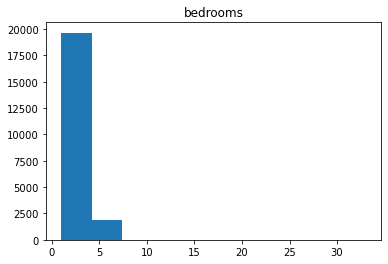

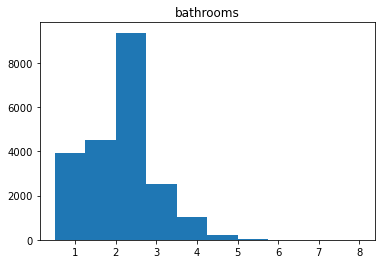

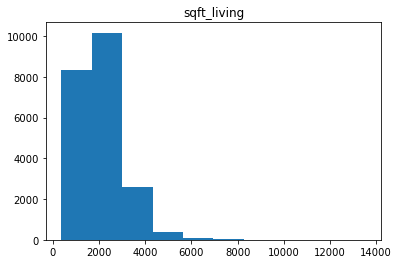

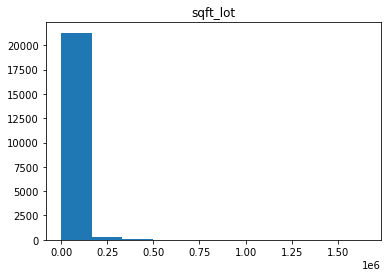

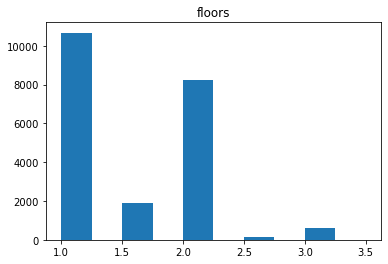

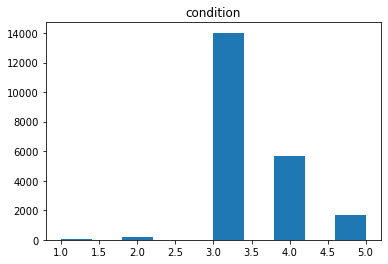

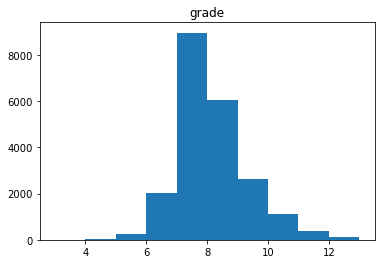

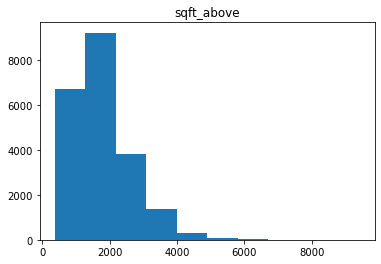

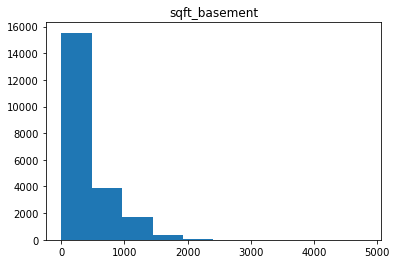

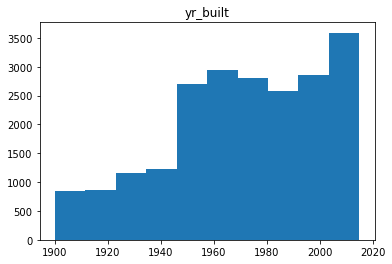

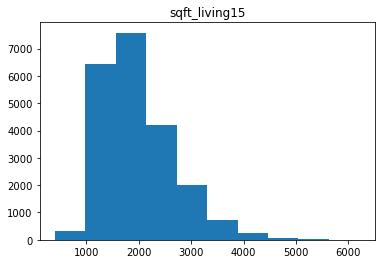

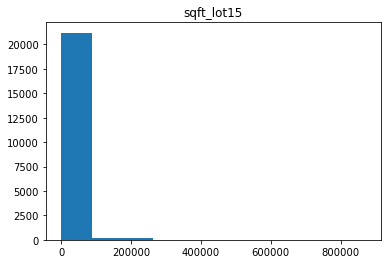

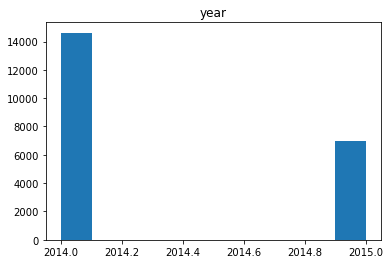

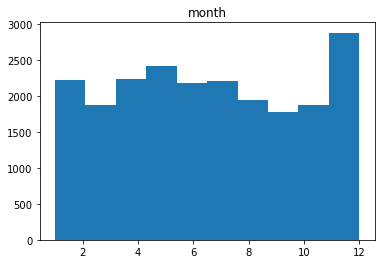

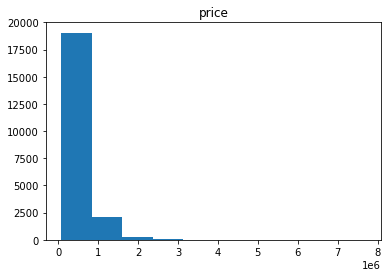

In [86]:
for i in numericals:
    plt.figure()
    plt.hist(data[i])
    plt.title(i)

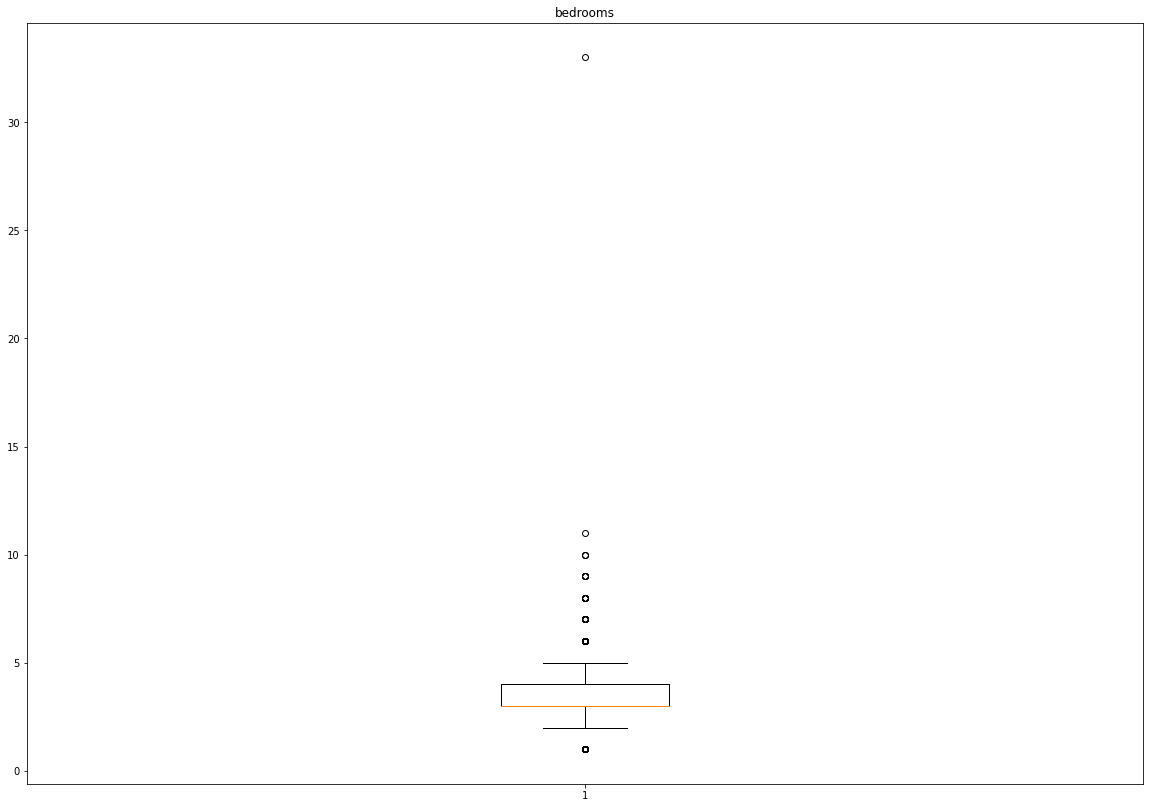

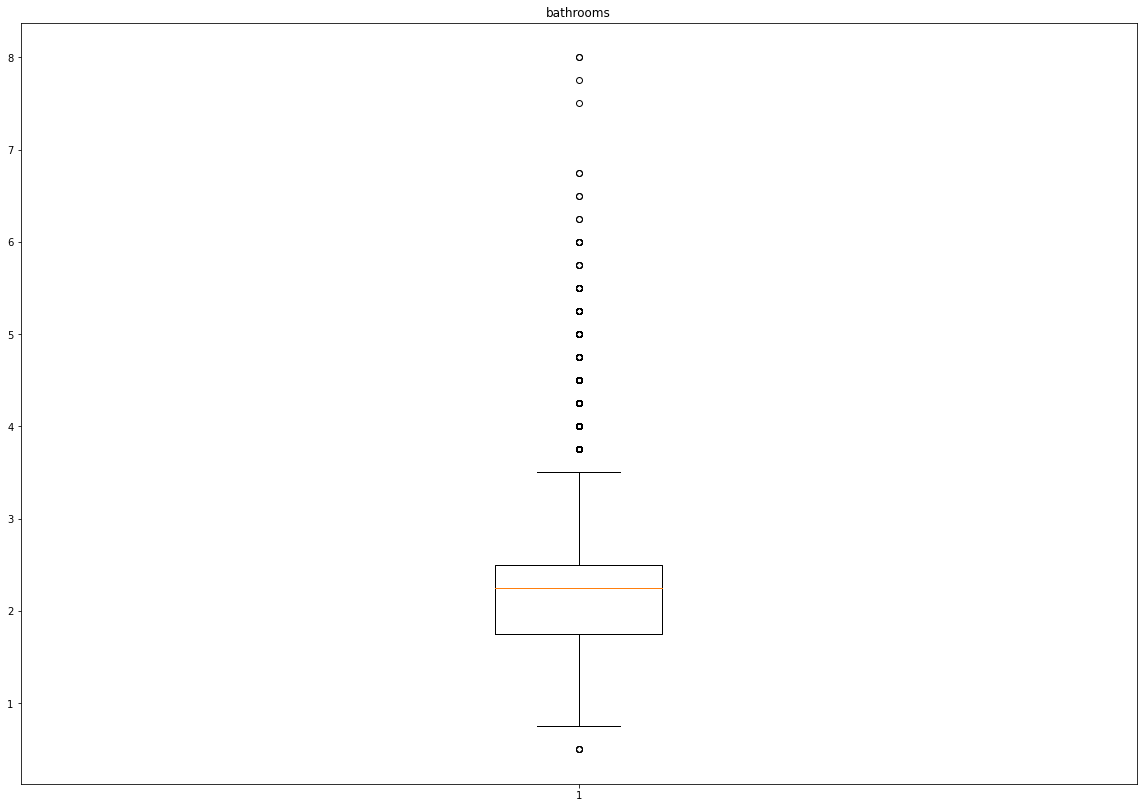

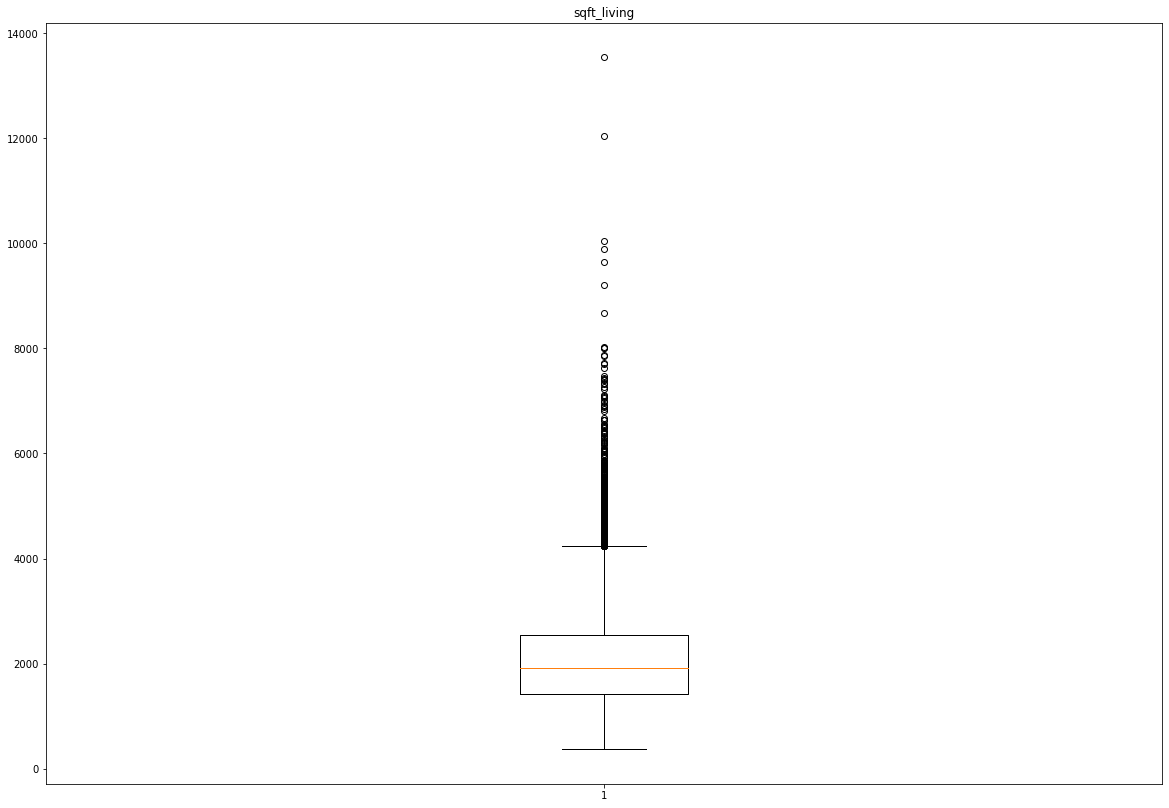

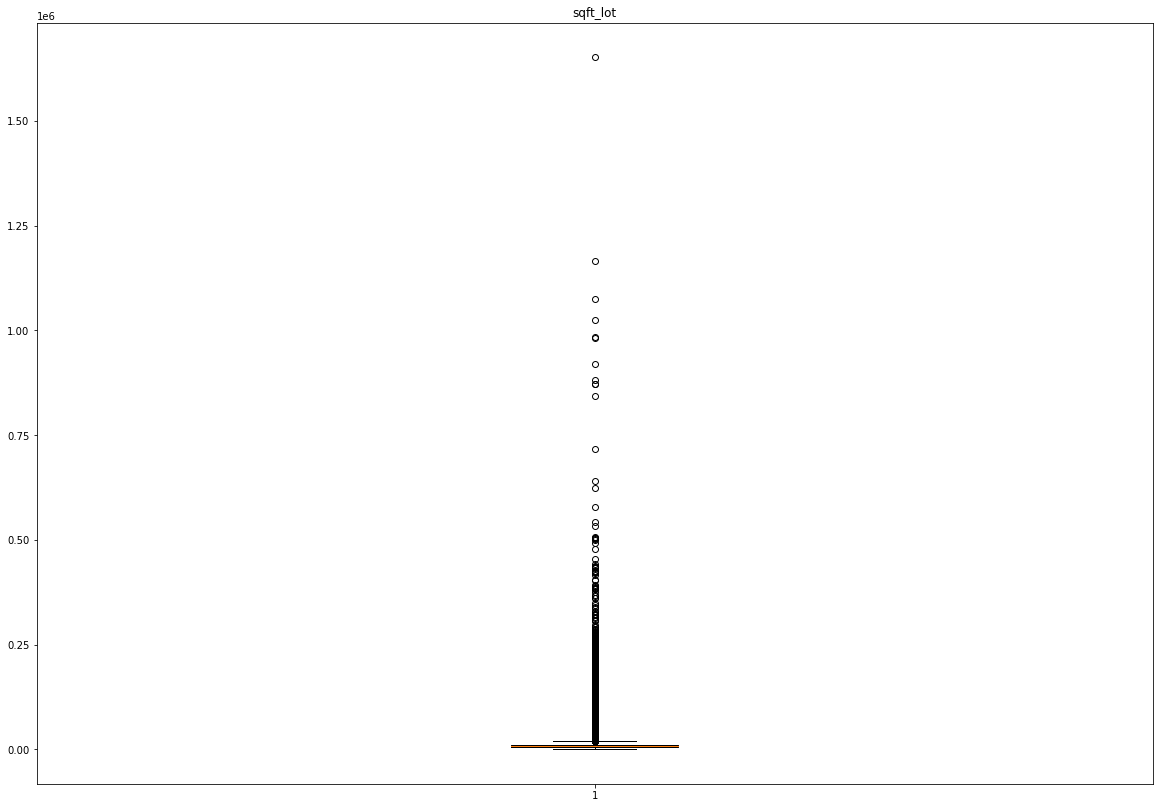

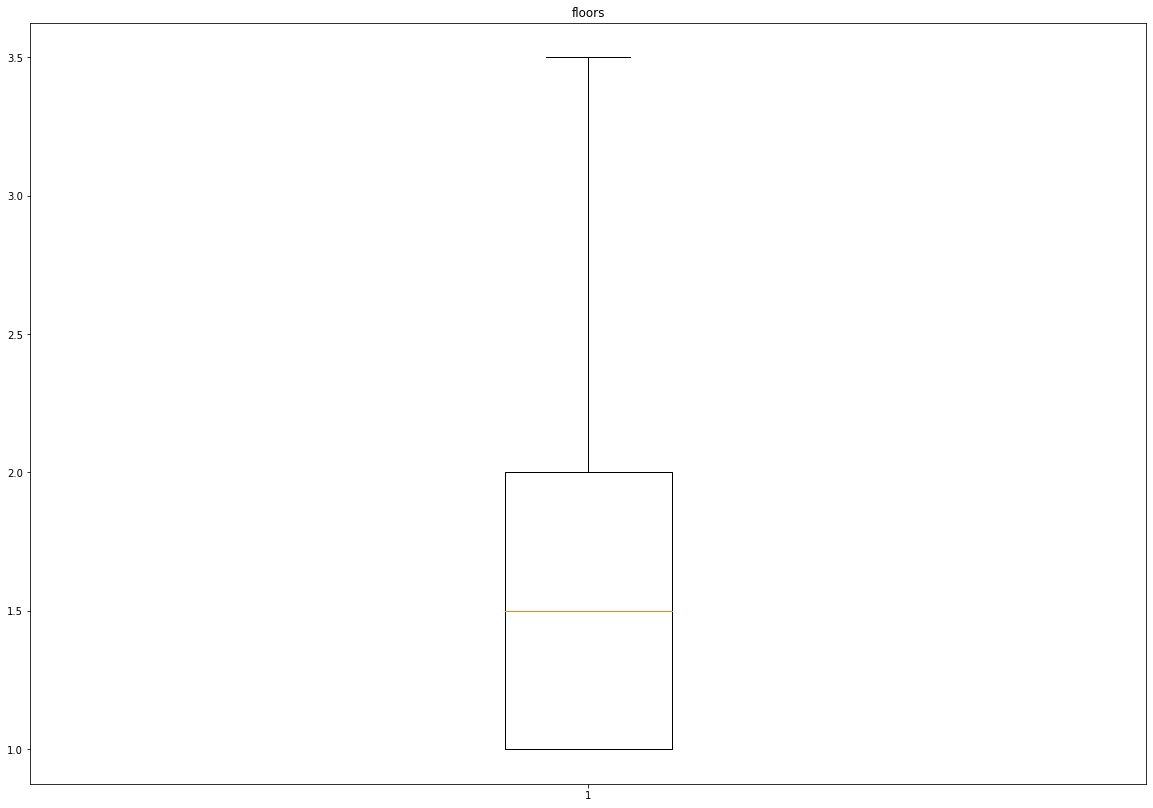

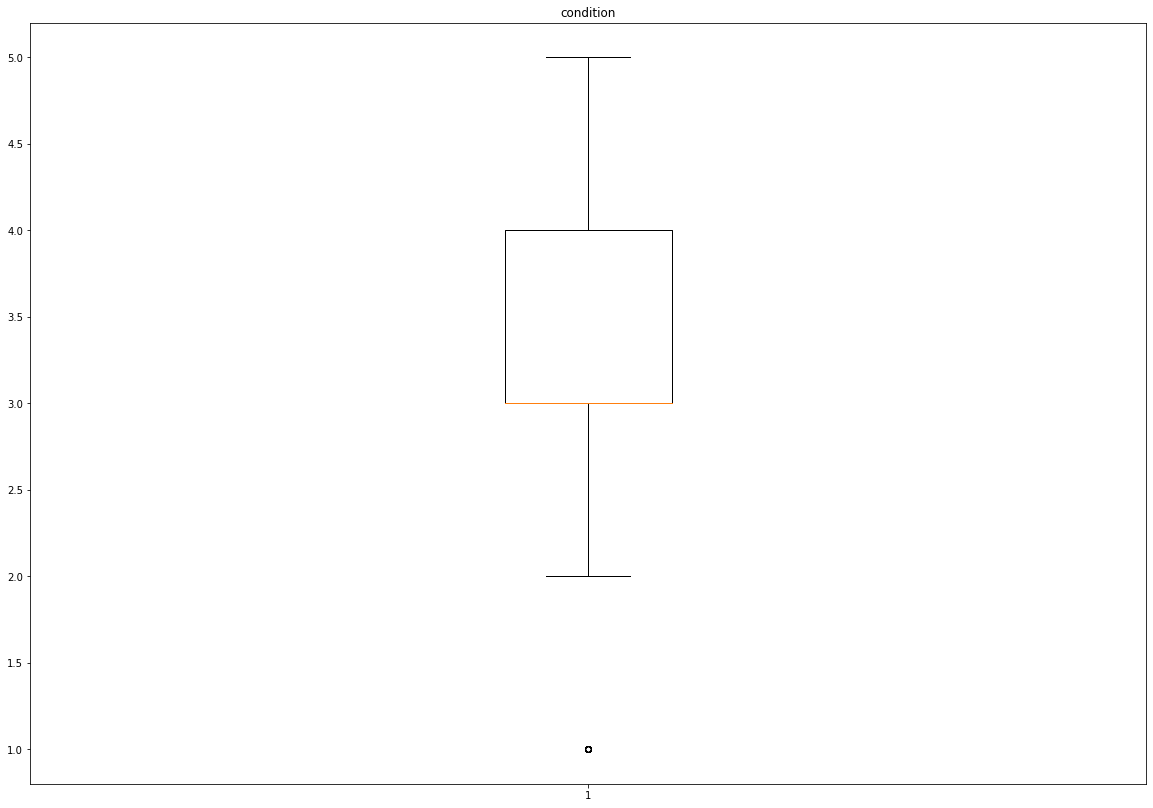

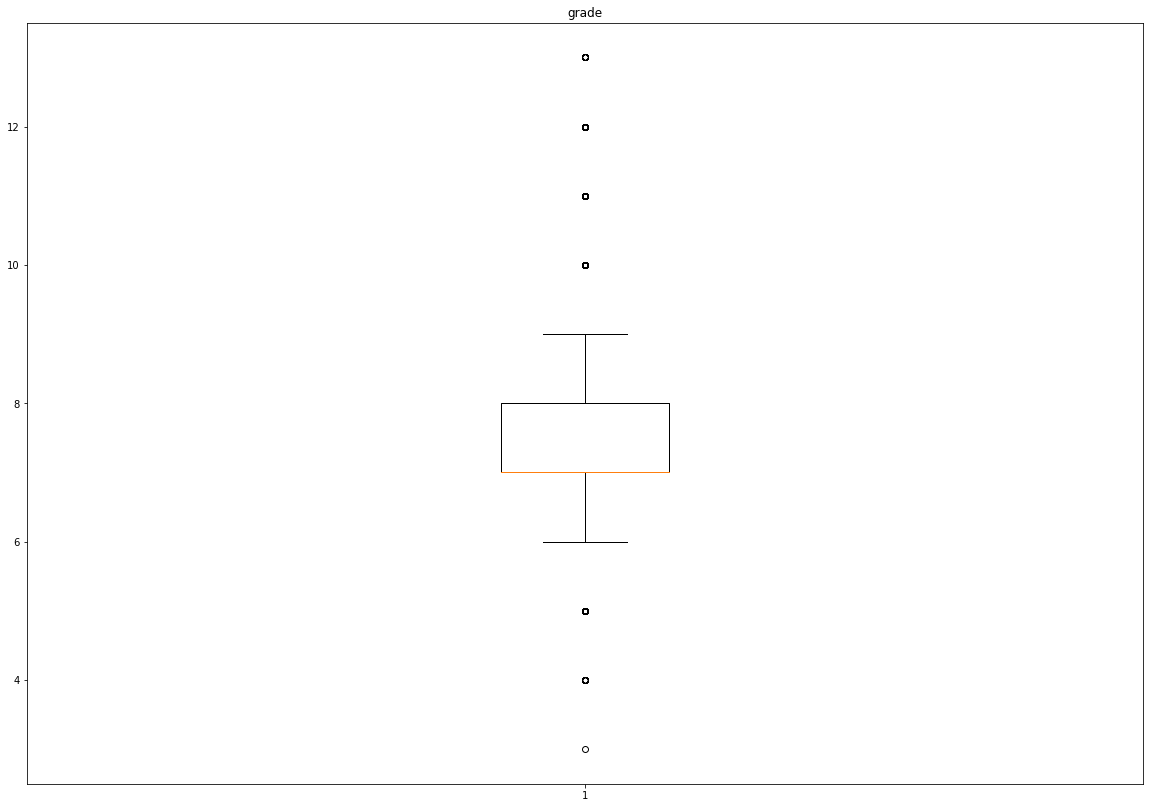

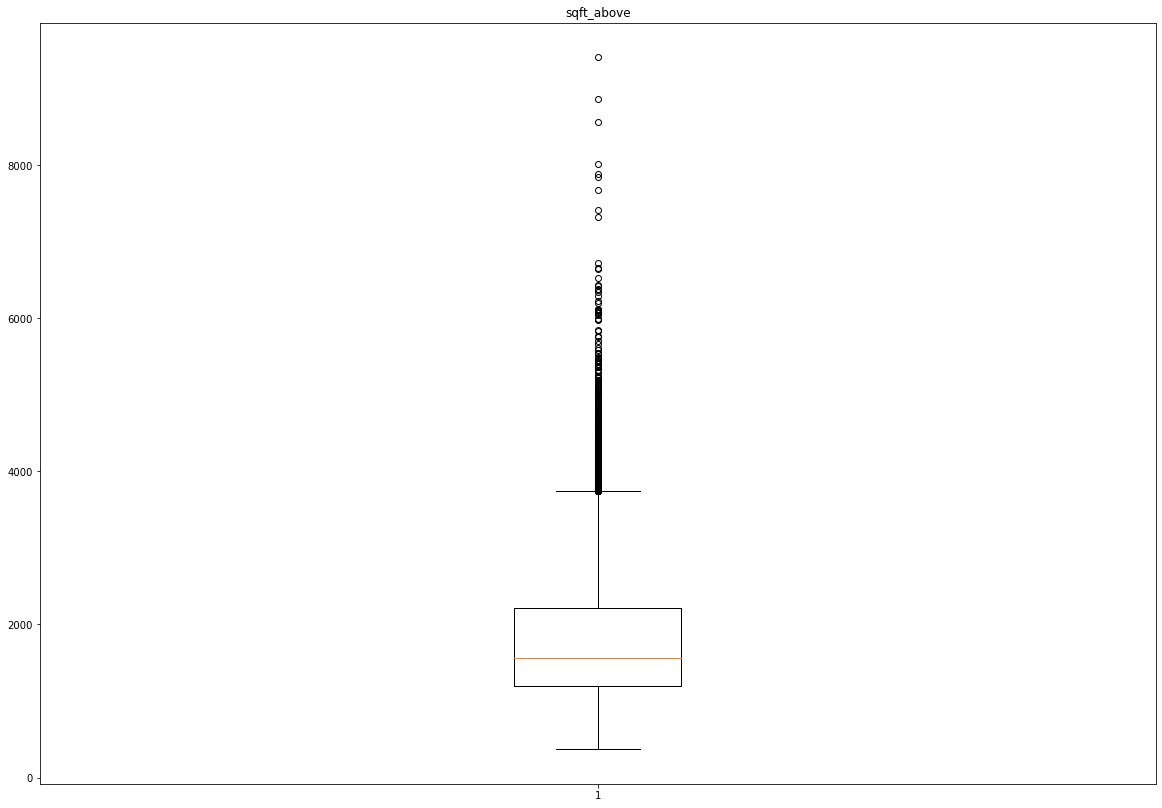

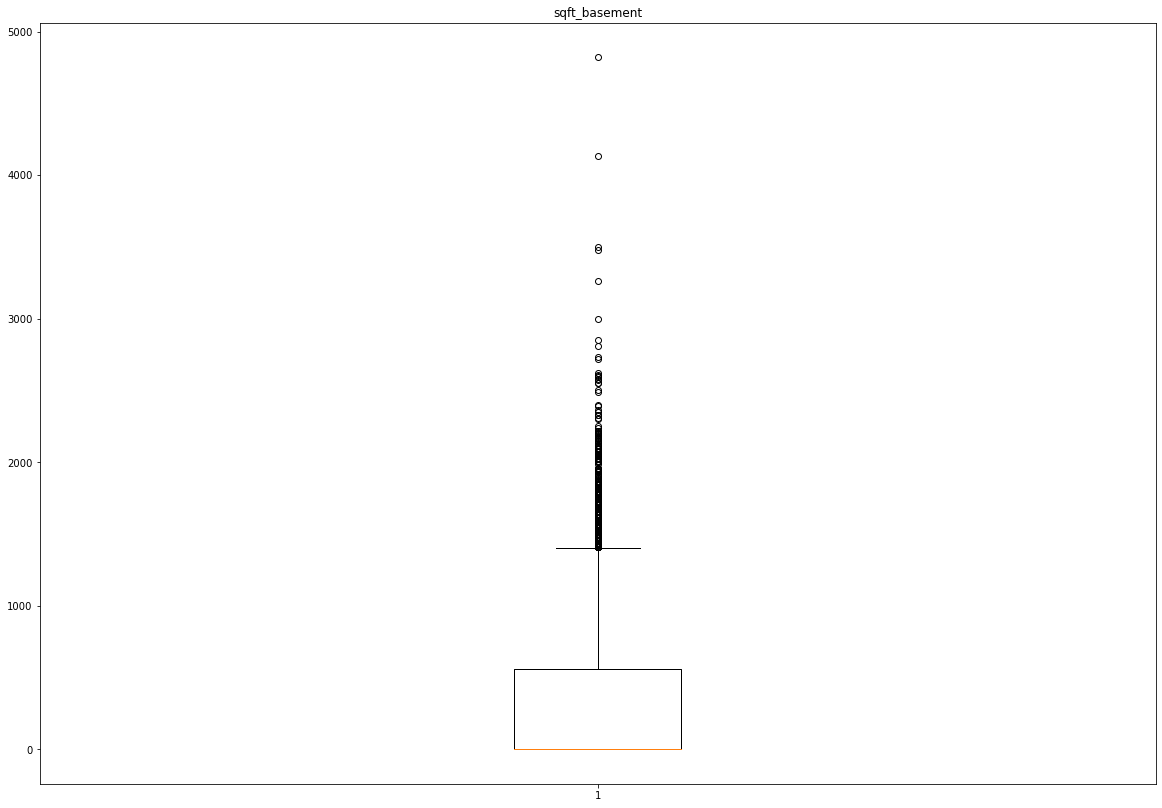

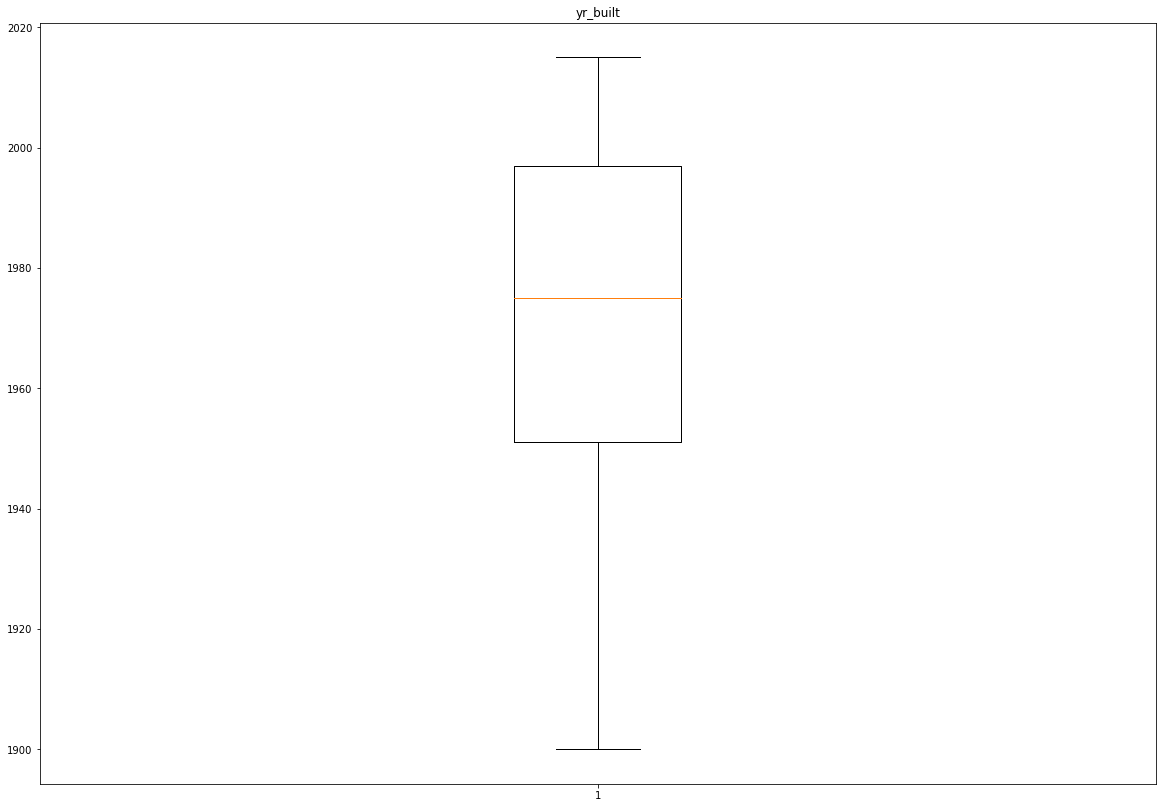

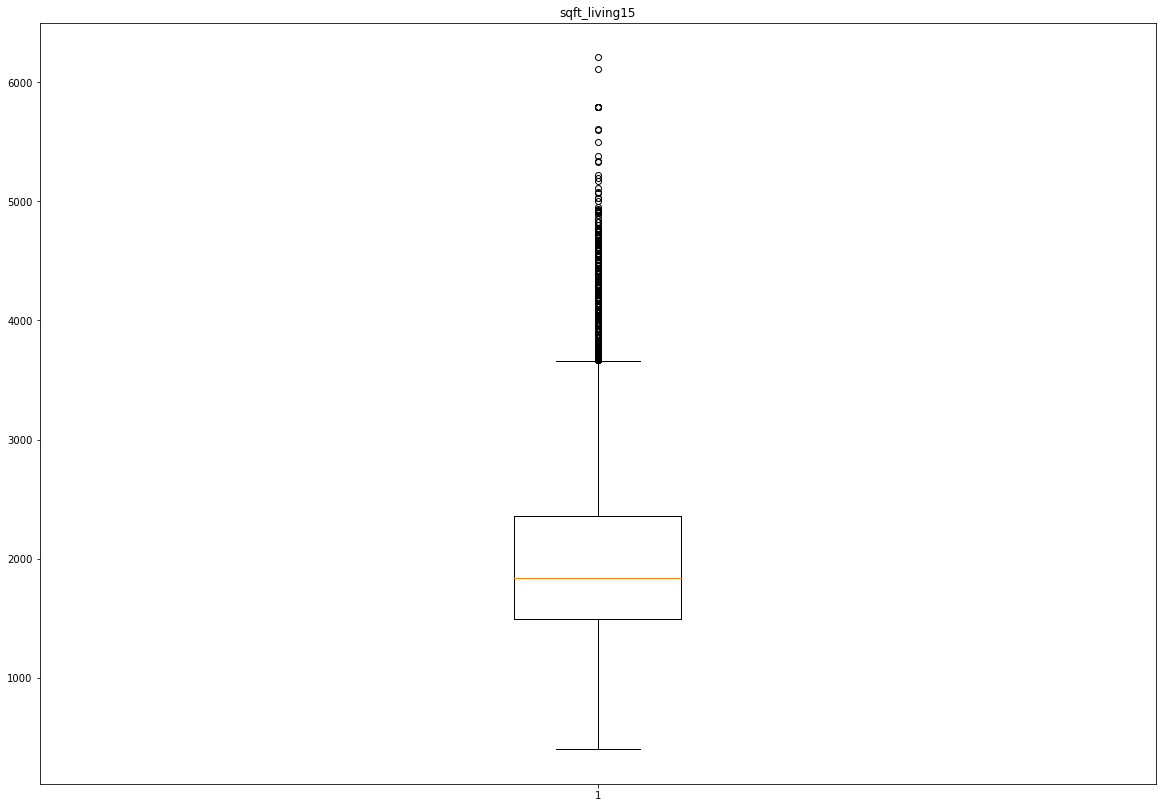

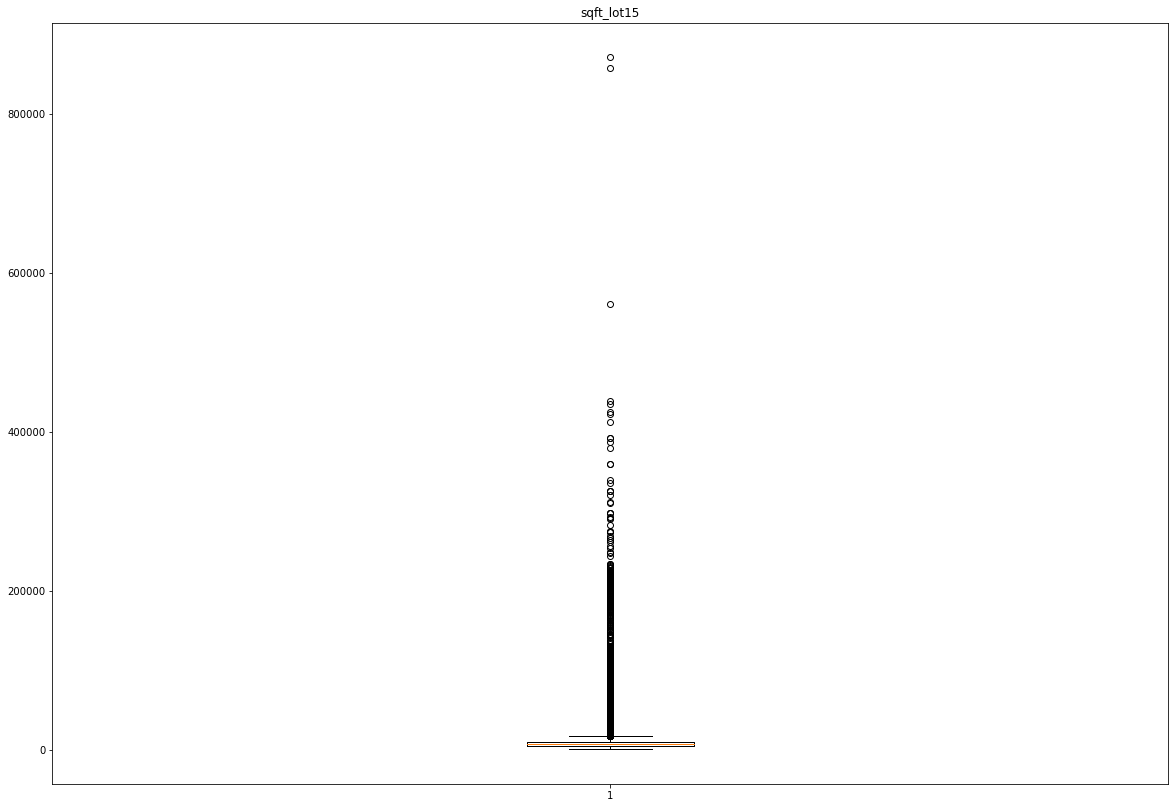

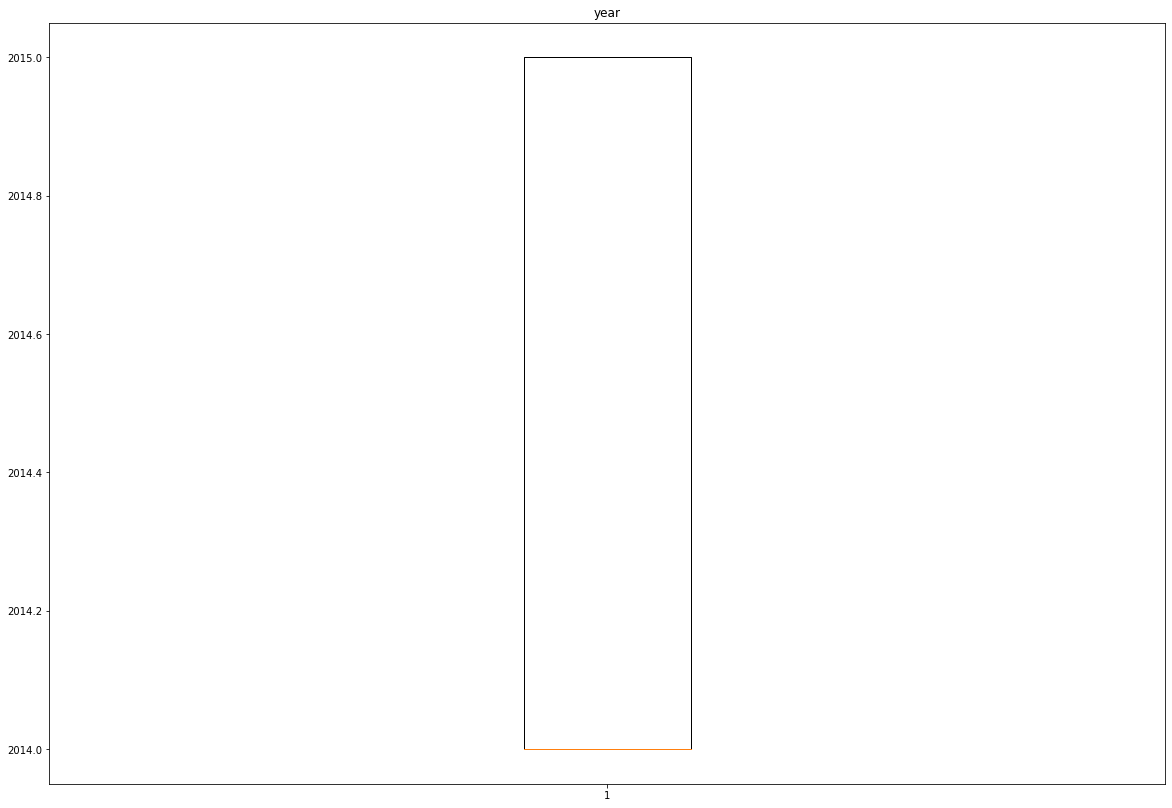

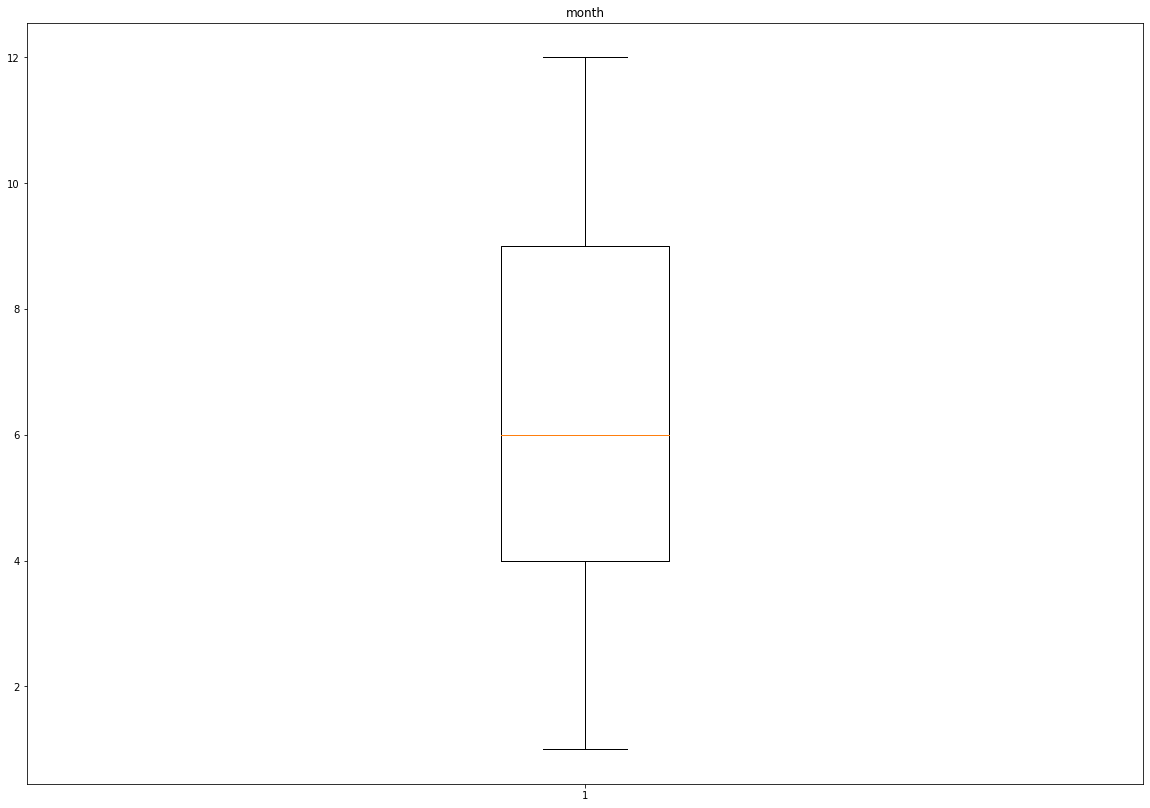

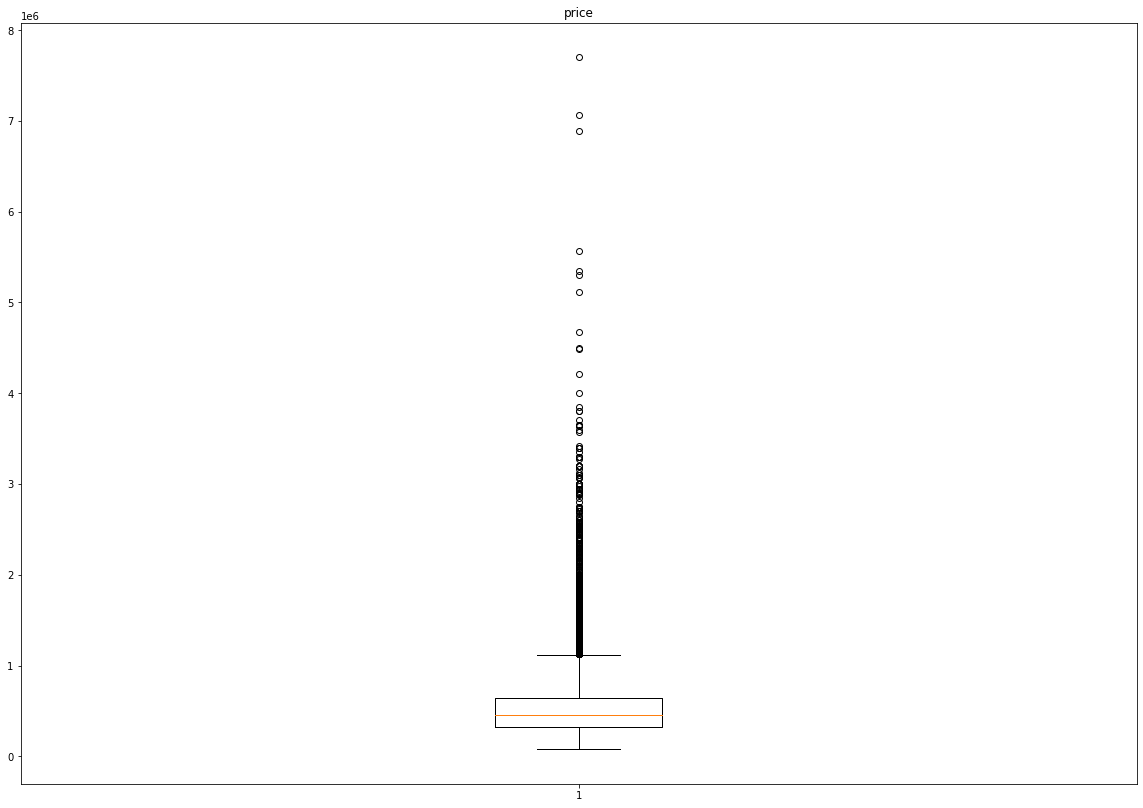

In [87]:
for i in numericals:
    plt.figure(figsize = (20,14))
    plt.boxplot(data[i])
    plt.title(i)

 - Since there are outliers I will remove them in order to make the model more accurate.

I AM GOING TO CHECK FOR CORRELATION NEXT

In [88]:
numericals.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21597.000000  21597.000000  21597.000000  2.159700e+04  21597.000000   
mean       3.373200      2.115826   2080.321850  1.509941e+04      1.494096   
std        0.926299      0.768984    918.106125  4.141264e+04      0.539683   
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1430.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.068500e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

          condition         grade    sqft_above  sqft_basement      yr_built  \
count  21597.000000  21597.000000  21597.000000   21597.000000  21597.000000   
mean       3.409825      7.657915   1788.596842     291.725008   1970.999676   
std        0.650546      1.173200    827.759761     442.667800     29.375234   
min        1.000000      3.000000    370.000000       0.000000   1900.000000   
25%        3.000000      7.000000   1190.000000       0.000000   1951.000000   
50%        3.000000      7.000000   1560.000000       0.000000   1975.000000   
75%        4.000000      8.000000   2210.000000     560.000000   1997.000000   
max        5.000000     13.000000   9410.000000    4820.000000   2015.000000   

       sqft_living15     sqft_lot15          year         month         price  
count   21597.000000   21597.000000  21597.000000  21597.000000  2.159700e+04  
mean     1986.620318   12758.283512   2014.322962      6.573969  5.402966e+05  
std       685.230472   27274.441950      0.467619      3.115061  3.673681e+05  
min       399.000000     651.000000   2014.000000      1.000000  7.800000e+04  
25%      1490.000000    5100.000000   2014.000000      4.000000  3.220000e+05  
50%      1840.000000    7620.000000   2014.000000      6.000000  4.500000e+05  
75%      2360.000000   10083.000000   2015.000000      9.000000  6.450000e+05  
max      6210.000000  871200.000000   2015.000000     12.000000  7.700000e+06

In [89]:
numericals.corr()

bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms       1.000000   0.514508     0.578212  0.032471  0.177944   
bathrooms      0.514508   1.000000     0.755758  0.088373  0.502582   
sqft_living    0.578212   0.755758     1.000000  0.173453  0.353953   
sqft_lot       0.032471   0.088373     0.173453  1.000000 -0.004814   
floors         0.177944   0.502582     0.353953 -0.004814  1.000000   
condition      0.026496  -0.126479    -0.059445 -0.008830 -0.264075   
grade          0.356563   0.665838     0.762779  0.114731  0.458794   
sqft_above     0.479386   0.686668     0.876448  0.184139  0.523989   
sqft_basement  0.302808   0.283440     0.435130  0.015418 -0.245715   
yr_built       0.155670   0.507173     0.318152  0.052946  0.489193   
sqft_living15  0.393406   0.569884     0.756402  0.144763  0.280102   
sqft_lot15     0.030690   0.088303     0.184342  0.718204 -0.010722   
year          -0.009949  -0.026577    -0.029014  0.005628 -0.022352   
month         -0.001046   0.007543     0.012112 -0.002591  0.014245   
price          0.308787   0.525906     0.701917  0.089876  0.256804   

               condition     grade  sqft_above  sqft_basement  yr_built  \
bedrooms        0.026496  0.356563    0.479386       0.302808  0.155670   
bathrooms      -0.126479  0.665838    0.686668       0.283440  0.507173   
sqft_living    -0.059445  0.762779    0.876448       0.435130  0.318152   
sqft_lot       -0.008830  0.114731    0.184139       0.015418  0.052946   
floors         -0.264075  0.458794    0.523989      -0.245715  0.489193   
condition       1.000000 -0.146896   -0.158904       0.173849 -0.361592   
grade          -0.146896  1.000000    0.756073       0.168220  0.447865   
sqft_above     -0.158904  0.756073    1.000000      -0.052156  0.424037   
sqft_basement   0.173849  0.168220   -0.052156       1.000000 -0.133064   
yr_built       -0.361592  0.447865    0.424037      -0.133064  1.000000   
sqft_living15  -0.093072  0.713867    0.731767       0.200443  0.326377   
sqft_lot15     -0.003126  0.120981    0.195077       0.017550  0.070777   
year           -0.045898 -0.030635   -0.023782      -0.015706  0.003574   
month           0.022388  0.008989    0.010153       0.006135 -0.006235   
price           0.036056  0.667951    0.605368       0.323799  0.053953   

               sqft_living15  sqft_lot15      year     month     price  
bedrooms            0.393406    0.030690 -0.009949 -0.001046  0.308787  
bathrooms           0.569884    0.088303 -0.026577  0.007543  0.525906  
sqft_living         0.756402    0.184342 -0.029014  0.012112  0.701917  
sqft_lot            0.144763    0.718204  0.005628 -0.002591  0.089876  
floors              0.280102   -0.010722 -0.022352  0.014245  0.256804  
condition          -0.093072   -0.003126 -0.045898  0.022388  0.036056  
grade               0.713867    0.120981 -0.030635  0.008989  0.667951  
sqft_above          0.731767    0.195077 -0.023782  0.010153  0.605368  
sqft_basement       0.200443    0.017550 -0.015706  0.006135  0.323799  
yr_built            0.326377    0.070777  0.003574 -0.006235  0.053953  
sqft_living15       1.000000    0.183515 -0.021549  0.002513  0.585241  
sqft_lot15          0.183515    1.000000  0.000162  0.003189  0.082845  
year               -0.021549    0.000162  1.000000 -0.782325  0.003727  
month               0.002513    0.003189 -0.782325  1.000000 -0.009928  
price               0.585241    0.082845  0.003727 -0.009928  1.000000

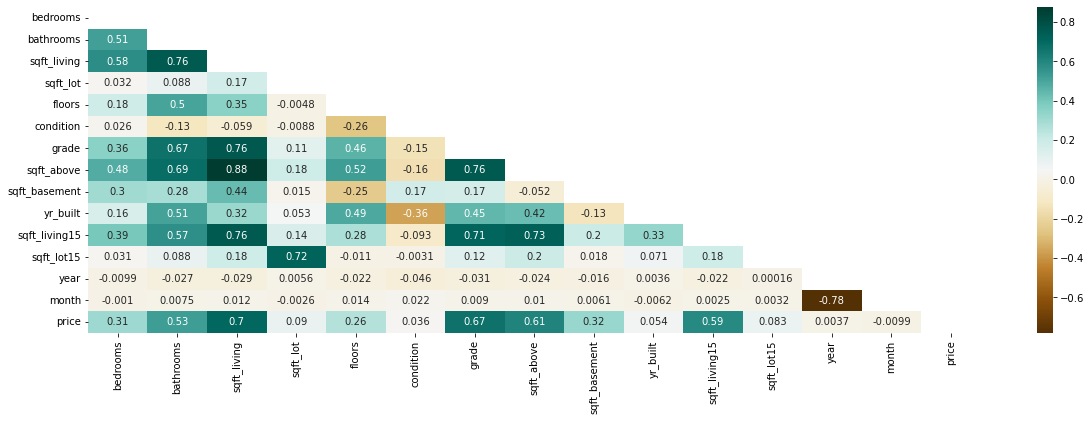

In [90]:
correlations_matrix = numericals.corr()
mask = np.triu(np.ones_like(numericals.corr(), dtype=bool))
fig, ax = plt.subplots(figsize= (20, 6))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap= 'BrBG')
plt.show()

In [91]:
numericals.transpose

<bound method DataFrame.transpose of        bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0             3       1.00         1180      5650     1.0          3      7   
1             3       2.25         2570      7242     2.0          3      7   
2             2       1.00          770     10000     1.0          3      6   
3             4       3.00         1960      5000     1.0          5      7   
4             3       2.00         1680      8080     1.0          3      8   
...         ...        ...          ...       ...     ...        ...    ...   
21592         3       2.50         1530      1131     3.0          3      8   
21593         4       2.50         2310      5813     2.0          3      8   
21594         2       0.75         1020      1350     2.0          3      7   
21595         3       2.50         1600      2388     2.0          3      8   
21596         2       0.75         1020      1076     2.0          3      7   

       sqft_ab

In [92]:
data.shape

(21597, 20)

In [93]:
data.shape[0]*.01

215.97

In [94]:
data.index

RangeIndex(start=0, stop=21597, step=1)

### HERE I AM WORKING ON VERIFYING OURLIERS WITH IQR

In [95]:
IQR = np.percentile(data['bedrooms'], 75) - np.percentile(data['bedrooms'], 25)
upper_limit = np.percentile(data['bedrooms'],75)+20*IQR
lower_limit = np.percentile(data['bedrooms'],25)-20*IQR

In [96]:
data_filter = data[(data['bedrooms']>lower_limit) & (data['bedrooms']<upper_limit)]

In [97]:
data_filter.shape

(21596, 20)

In [98]:
(data.isna().sum()/len(data))*100

bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
year             0.0
month            0.0
price            0.0
dtype: float64

In [99]:
upper_limit

24.0

In [100]:
lower_limit

-17.0

In [101]:
IQR

1.0

In [102]:
data = data[(data['bedrooms']>lower_limit) & (data['bedrooms']<upper_limit)]

In [103]:
data.shape

(21596, 20)

In [104]:
IQR = np.percentile(data['bathrooms'], 75) - np.percentile(data['bathrooms'], 25)

upper_limit = np.percentile(data['bathrooms'],75)+1.5*IQR
lower_limit = np.percentile(data['bathrooms'],25)-1.5*IQR

data = data[(data['bathrooms']>lower_limit) & (data['bathrooms']<upper_limit)]

In [105]:
IQR = np.percentile(data['sqft_living'], 75) - np.percentile(data['sqft_living'], 25)

upper_limit = np.percentile(data['sqft_living'],75)+1.5*IQR
lower_limit = np.percentile(data['sqft_living'],25)-1.5*IQR

data = data[(data['sqft_living']>lower_limit) & (data['sqft_living']<upper_limit)]

In [106]:
IQR = np.percentile(data['sqft_basement'], 75) - np.percentile(data['sqft_basement'], 25)

upper_limit = np.percentile(data['sqft_basement'],75)+1.5*IQR
lower_limit = np.percentile(data['sqft_basement'],25)-1.5*IQR

In [107]:
IQR

520.0

In [108]:
IQR = np.percentile(data['sqft_lot'], 75) - np.percentile(data['sqft_lot'], 25)

upper_limit = np.percentile(data['sqft_lot'],75)+1.5*IQR
lower_limit = np.percentile(data['sqft_lot'],25)-1.5*IQR

In [109]:
IQR = np.percentile(data['sqft_above'], 75) - np.percentile(data['sqft_above'], 25)

upper_limit = np.percentile(data['sqft_above'],75)+1.5*IQR
lower_limit = np.percentile(data['sqft_above'],25)-1.5*IQR

data = data[(data['sqft_above']>lower_limit) & (data['sqft_above']<upper_limit)]

In [110]:
IQR

930.0

In [111]:
data = data[(data['sqft_lot']>lower_limit) & (data['sqft_lot']<upper_limit)]

In [112]:
data.shape

(2318, 20)

In [113]:
data.reset_index(drop = True, inplace = True)

In [114]:
data

bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront view  \
0            3       1.75         2450      2691     2.0          0    0   
1            3       1.00         1400      1581     1.5          0    0   
2            2       1.50         1190      1265     3.0          0    0   
3            3       1.00         1090      3000     1.5          0    0   
4            3       2.50         2300      3060     1.5          0    0   
...        ...        ...          ...       ...     ...        ...  ...   
2313         3       2.50         1310      1294     2.0          0    0   
2314         3       2.50         1530      1131     3.0          0    0   
2315         2       0.75         1020      1350     2.0          0    0   
2316         3       2.50         1600      2388     2.0          0    0   
2317         2       0.75         1020      1076     2.0          0    0   

      condition  grade  sqft_above  sqft_basement  yr_built zipcode      lat  \
0             3      8        1750            700      1915   98119  47.6386   
1             5      8        1400              0      1909   98112  47.6221   
2             3      7        1190              0      2005   98133  47.7274   
3             4      8        1090              0      1929   98117  47.6889   
4             3      8        1510            790      1930   98115  47.6827   
...         ...    ...         ...            ...       ...     ...      ...   
2313          3      8        1180            130      2008   98116  47.5773   
2314          3      8        1530              0      2009   98103  47.6993   
2315          3      7        1020              0      2009   98144  47.5944   
2316          3      8        1600              0      2004   98027  47.5345   
2317          3      7        1020              0      2008   98144  47.5941   

         long  sqft_living15  sqft_lot15  year  month   price  
0     -122.36           1760        3573  2014      6  937000  
1    -122.314           1860        3861  2014     12  667000  
2    -122.357           1390        1756  2014     12  280000  
3    -122.375           1570        5080  2014     11  535000  
4     -122.31           1590        3264  2014      6  696000  
...       ...            ...         ...   ...    ...     ...  
2313 -122.409           1330        1265  2015      2  475000  
2314 -122.346           1530        1509  2014      5  360000  
2315 -122.299           1020        2007  2014      6  402101  
2316 -122.069           1410        1287  2015      1  400000  
2317 -122.299           1020        1357  2014     10  325000  

[2318 rows x 20 columns]

In [115]:
y = data['price']
x = data = data.drop(['price'], axis = 1)

In [116]:
data.shape

(2318, 19)

# I dont think i need to do this becuase there are no categoricals but i did it anyway

I kept this comment becuase at the time of writing I was confused as to what was needed to be done, I will use this for reference

I am going to endcode the categorical data so the model can read it properly and normalze the numerical data

In [117]:
x_num = data.select_dtypes(include = np.number)
x_cat = data.select_dtypes(include = np.object)
x_cat

waterfront view zipcode      lat     long
0             0    0   98119  47.6386  -122.36
1             0    0   98112  47.6221 -122.314
2             0    0   98133  47.7274 -122.357
3             0    0   98117  47.6889 -122.375
4             0    0   98115  47.6827  -122.31
...         ...  ...     ...      ...      ...
2313          0    0   98116  47.5773 -122.409
2314          0    0   98103  47.6993 -122.346
2315          0    0   98144  47.5944 -122.299
2316          0    0   98027  47.5345 -122.069
2317          0    0   98144  47.5941 -122.299

[2318 rows x 5 columns]

In [118]:
encoded = OneHotEncoder().fit_transform(x_cat).toarray()
encoded = pd.DataFrame(encoded)

In [119]:
encoded.shape

(2318, 1687)

In [120]:
normalized = Normalizer().fit_transform(x_num)
normalized = pd.DataFrame(normalized)

In [121]:
normalized

0         1         2         3         4         5         6   \
0     0.000472  0.000275  0.385533  0.423457  0.000315  0.000472  0.001259   
1     0.000526  0.000175  0.245625  0.277380  0.000263  0.000877  0.001404   
2     0.000478  0.000358  0.284265  0.302181  0.000717  0.000717  0.001672   
3     0.000436  0.000145  0.158279  0.435630  0.000218  0.000581  0.001162   
4     0.000483  0.000403  0.370578  0.493030  0.000242  0.000483  0.001289   
...        ...       ...       ...       ...       ...       ...       ...   
2313  0.000744  0.000620  0.324858  0.320890  0.000496  0.000744  0.001984   
2314  0.000694  0.000579  0.354082  0.261743  0.000694  0.000694  0.001851   
2315  0.000484  0.000182  0.246921  0.326807  0.000484  0.000726  0.001695   
2316  0.000632  0.000527  0.336985  0.502950  0.000421  0.000632  0.001685   
2317  0.000531  0.000199  0.270596  0.285452  0.000531  0.000796  0.001857   

            7         8         9         10        11        12        13  
0     0.275381  0.110152  0.301345  0.276954  0.562249  0.316924  0.000944  
1     0.245625  0.000000  0.334927  0.326330  0.677398  0.353349  0.002105  
2     0.284265  0.000000  0.478952  0.332041  0.419471  0.481101  0.002867  
3     0.158279  0.000000  0.280110  0.227980  0.737667  0.292453  0.001597  
4     0.243293  0.127286  0.310964  0.256182  0.525899  0.324498  0.000967  
...        ...       ...       ...       ...       ...       ...       ...  
2313  0.292620  0.032238  0.497950  0.329817  0.313698  0.499686  0.000496  
2314  0.354082  0.000000  0.464935  0.354082  0.349222  0.466092  0.001157  
2315  0.246921  0.000000  0.486338  0.246921  0.485853  0.487548  0.001452  
2316  0.336985  0.000000  0.422074  0.296968  0.271062  0.424391  0.000211  
2317  0.270596  0.000000  0.532702  0.270596  0.359998  0.534294  0.002653  

[2318 rows x 14 columns]

In [122]:
encoded

0     1     2     3     4     5     6     7     8     9     10    11    \
0      1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1      1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2      1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3      1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4      1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2313   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2314   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2315   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2316   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2317   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      12    13    14    15    16    17    18    19    20    21    22    23    \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2313   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2314   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2315   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2316   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
2317   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      24    25    26    27    28    29    30    31    32    33    34    35    \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2313   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2314   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2315   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2316   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2317   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      36    37    38    39    40    41    42    43    44    45    46    47    \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2313   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2314   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
2315   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2316   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2317   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      48    49    50    51    52    53    54    55    56    57    58    59    \
0      0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
1 

In [123]:
x_features = np.concatenate((normalized, encoded), axis = 1)
x_features = pd.DataFrame(x_features)

x_features

0         1         2         3         4         5         6     \
0     0.000472  0.000275  0.385533  0.423457  0.000315  0.000472  0.001259   
1     0.000526  0.000175  0.245625  0.277380  0.000263  0.000877  0.001404   
2     0.000478  0.000358  0.284265  0.302181  0.000717  0.000717  0.001672   
3     0.000436  0.000145  0.158279  0.435630  0.000218  0.000581  0.001162   
4     0.000483  0.000403  0.370578  0.493030  0.000242  0.000483  0.001289   
...        ...       ...       ...       ...       ...       ...       ...   
2313  0.000744  0.000620  0.324858  0.320890  0.000496  0.000744  0.001984   
2314  0.000694  0.000579  0.354082  0.261743  0.000694  0.000694  0.001851   
2315  0.000484  0.000182  0.246921  0.326807  0.000484  0.000726  0.001695   
2316  0.000632  0.000527  0.336985  0.502950  0.000421  0.000632  0.001685   
2317  0.000531  0.000199  0.270596  0.285452  0.000531  0.000796  0.001857   

          7         8         9         10        11        12        13    \
0     0.275381  0.110152  0.301345  0.276954  0.562249  0.316924  0.000944   
1     0.245625  0.000000  0.334927  0.326330  0.677398  0.353349  0.002105   
2     0.284265  0.000000  0.478952  0.332041  0.419471  0.481101  0.002867   
3     0.158279  0.000000  0.280110  0.227980  0.737667  0.292453  0.001597   
4     0.243293  0.127286  0.310964  0.256182  0.525899  0.324498  0.000967   
...        ...       ...       ...       ...       ...       ...       ...   
2313  0.292620  0.032238  0.497950  0.329817  0.313698  0.499686  0.000496   
2314  0.354082  0.000000  0.464935  0.354082  0.349222  0.466092  0.001157   
2315  0.246921  0.000000  0.486338  0.246921  0.485853  0.487548  0.001452   
2316  0.336985  0.000000  0.422074  0.296968  0.271062  0.424391  0.000211   
2317  0.270596  0.000000  0.532702  0.270596  0.359998  0.534294  0.002653   

      14    15    16    17    18    19    20    21    22    23    24    25    \
0      1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1      1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2      1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3      1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4      1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2313   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2314   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2315   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2316   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2317   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      26    27    28    29    30    31    32    33    34    35    36    37    \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2313   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2314   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2315   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2316   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
2317   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      38    39    40    41    42    43    44    45    46    47    48    49    \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y, test_size = 0.75, random_state = 1000)

In [125]:
x_train.shape

(579, 1701)

In [126]:
x_test.shape

(1739, 1701)

In [127]:
y_test.shape

(1739,)

In [128]:
y_train.shape

(579,)

In [129]:
model = LinearRegression()  
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [130]:
predictions = model.predict(x_test)

In [131]:
x_test.head()

0         1         2         3         4         5         6     \
2236  0.000764  0.000636  0.272364  0.277201  0.000509  0.000764  0.001782   
1811  0.000539  0.000449  0.298077  0.485409  0.000360  0.000539  0.001438   
169   0.000532  0.000443  0.271241  0.512344  0.000355  0.000532  0.001241   
951   0.000625  0.000352  0.412508  0.468759  0.000313  0.000469  0.001094   
1368  0.000317  0.000159  0.237858  0.542316  0.000159  0.000476  0.001110   

          7         8         9         10        11        12        13    \
2236  0.229092  0.043273  0.511383  0.369092  0.365783  0.512911  0.000509   
1811  0.298077  0.000000  0.362079  0.298077  0.485409  0.362079  0.000899   
169   0.271241  0.000000  0.354741  0.273014  0.512344  0.357045  0.001241   
951   0.325006  0.087502  0.298131  0.298443  0.468759  0.314850  0.000625   
1368  0.237858  0.000000  0.301604  0.325073  0.542316  0.319364  0.000951   

      14    15    16    17    18    19    20    21    22    23    24    25    \
2236   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1811   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
169    1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
951    1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1368   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      26    27    28    29    30    31    32    33    34    35    36    37    \
2236   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1811   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
169    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
951    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1368   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      38    39    40    41    42    43    44    45    46    47    48    49    \
2236   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1811   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
169    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
951    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1368   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      50    51    52    53    54    55    56    57    58    59    60    61    \
2236   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1811   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
169    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
951    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
1368   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   

      62    63    64    65    66    67    68    69    70    71    72    73    \
2236   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1811   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
169    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
951    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1368   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      74    75    76    77    78    79    80    81    82    83    84    85    \
2236   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1811   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
169    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
951    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1368   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      86    87    88    89    90    91    92    93    94    95    96    97    \
2236   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1811   0.0   0.0   0.0   0

In [132]:
predictions

array([ 2.68577178e+08,  5.19234064e+08,  6.59683626e+04, ...,
       -1.21364611e+09,  6.91255293e+08, -1.32837390e+09])

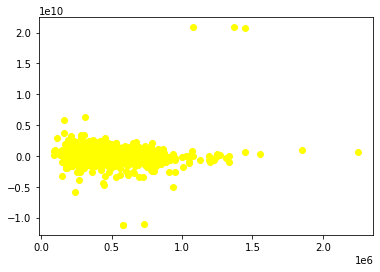

In [133]:
plt.scatter(y_test, predictions,  color='yellow')

plt.show()

I am going to run all the models here to see which is the most accurate

In [134]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 625008974.1906345
Mean Squared Error: 1.6734845222385485e+18
Root Mean Squared Error: 1293632297.9264812
R2: -49605842.16146281


### Well 50% accuracy was not was I was hoping for

# LETS TRY  KNN

In [135]:
# Standardization/Standard Scaler

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(x_num)
x_standardized = transformer.transform(x_num)
x_standardized

array([[ 0.28036718, -0.61765039,  2.07753022, ...,  0.61872819,
        -0.67259271, -0.21470443],
       [ 0.28036718, -1.75393103, -0.26656349, ...,  0.81573674,
        -0.67259271,  1.72181259],
       [-1.09071114, -0.9964106 , -0.73538223, ..., -0.62420419,
        -0.67259271,  1.72181259],
       ...,
       [-1.09071114, -2.13269124, -1.11490217, ..., -0.45250577,
        -0.67259271, -0.21470443],
       [ 0.28036718,  0.51863025,  0.17993055, ..., -0.94502714,
         1.48678388, -1.82846862],
       [-1.09071114, -2.13269124, -1.11490217, ..., -0.89714312,
        -0.67259271,  1.07630692]])

In [136]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(x_num)
x_normalized = transformer.transform(x_num)
x_normalized

array([[4.72081329e-04, 2.75380775e-04, 3.85533085e-01, ...,
        5.62248863e-01, 3.16923932e-01, 9.44162658e-04],
       [5.26338436e-04, 1.75446145e-04, 2.45624603e-01, ...,
        6.77397567e-01, 3.53348536e-01, 2.10535374e-03],
       [4.77757141e-04, 3.58317856e-04, 2.84265499e-01, ...,
        4.19470770e-01, 4.81101441e-01, 2.86654285e-03],
       ...,
       [4.84158921e-04, 1.81559595e-04, 2.46921050e-01, ...,
        4.85853477e-01, 4.87548033e-01, 1.45247676e-03],
       [6.31847184e-04, 5.26539320e-04, 3.36985165e-01, ...,
        2.71062442e-01, 4.24390692e-01, 2.10615728e-04],
       [5.30579550e-04, 1.98967331e-04, 2.70595570e-01, ...,
        3.59998225e-01, 5.34293607e-01, 2.65289775e-03]])

In [137]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(x_num)
x_min_max = transformer.transform(x_num)
x_min_max

array([[0.28571429, 0.36363636, 0.59090909, ..., 0.21023095, 0.        ,
        0.45454545],
       [0.28571429, 0.09090909, 0.29261364, ..., 0.23095187, 0.        ,
        1.        ],
       [0.14285714, 0.27272727, 0.23295455, ..., 0.07950212, 0.        ,
        1.        ],
       ...,
       [0.14285714, 0.        , 0.18465909, ..., 0.09756098, 0.        ,
        0.45454545],
       [0.28571429, 0.63636364, 0.34943182, ..., 0.04575869, 1.        ,
        0.        ],
       [0.14285714, 0.        , 0.18465909, ..., 0.05079502, 0.        ,
        0.81818182]])

In [138]:
data.shape

(2318, 19)

Text(0.5, 1.0, 'sqft_above (Normalized)')

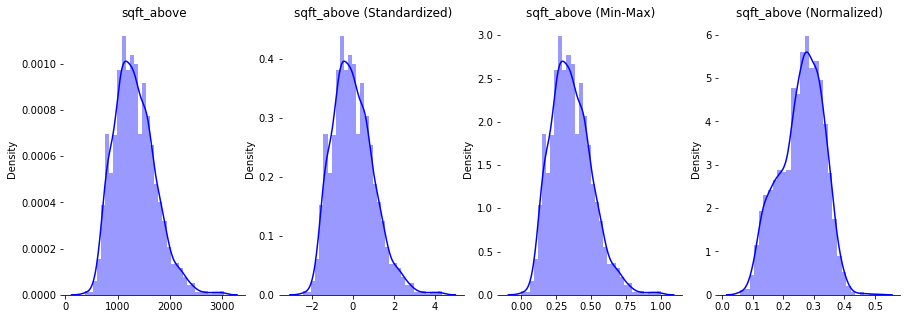

In [161]:
f, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=False)
sns.despine(left=True)

col = (7)
sns.distplot(x_num.values[:,col], kde=True, color="b", ax=axes[0])
sns.distplot(x_standardized[:,col], kde=True, color="b", ax=axes[1])
sns.distplot(x_min_max[:,col], kde=True, color="b", ax=axes[2])
sns.distplot(x_normalized[:,col], kde=True, color="b", ax=axes[3])

axes[0].set_title(f'{x_num.columns[col]}')
axes[1].set_title(f'{x_num.columns[col]} (Standardized)')
axes[2].set_title(f'{x_num.columns[col]} (Min-Max)')
axes[3].set_title(f'{x_num.columns[col]} (Normalized)')

In [140]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(x_train, y_train)

predictions = model.predict(x_test)
score = model.score(x_test, y_test)

from sklearn import linear_model
from sklearn.metrics import r2_score
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
# predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.4651408961065493

Text(0, 0.5, 'Accuracy')

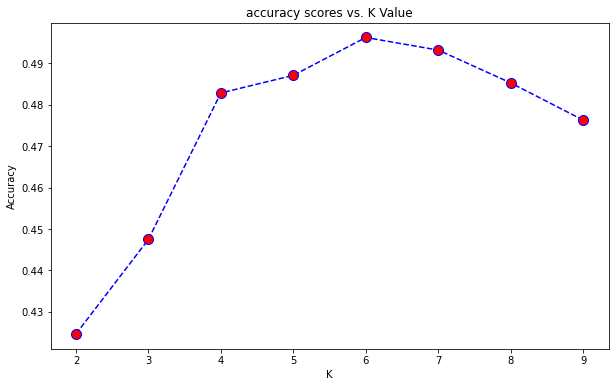

In [141]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))


plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

# LOOKS LIKE 50 PERCENT ACROSS THE BOARD. I WOULD HAVE LIKED TO GONE BACK WITH MORE TIME TO FIGURE OUT WHERE I NEED TO FINETUNE MY CODE AN DATA.